# **Capstone Project Modul 2 : Analisis Supermarket Customers**
# **JCDS 0406 - Permadi Ilham Saputra**

## Latarbelakang

Perusahaan ini bergerak di bidang supermarket, ingin mengetahui bagaimana karakteristik pelanggan dan pola penjualan beragam produk mereka, lalu mengetahui strategi seperti apa yang dapat diterapkan untuk menarik pelanggan baru dan meningkatkan retensi pelanggan. Marketing Manager perusahaan ini berharap ada peningkatan pendapatan serta pemasaran yang lebih baik untuk tahun selanjutnya.


## Stakeholder

Marketing Manager dari perusahaan Supermarket

## Pertanyaan Masalah

Dari dataset yang telah diberikan, perusahaan akan jauh lebih baik ketika kita bisa menjabarkan dan menjawab pertanyaan seputar prospek kedepannya. Pertanyaan tersebut diantaranya adalah :

1. Bagaimana karakteristik pelanggan dan apakah ada kategori produk yang lebih disukai oleh pelanggan dibandingkan dengan yang lain ?
2. Strategi seperti apa yang dapat diterapkan untuk menarik pelanggan baru dan meningkatkan retensi pelanggan ?

## Tujuan

Tujuan penganalisisan ini guna untuk mengetahui strategi apa yang diambil untuk meningkatan pendapatan, menarik pelanggan baru dan meningkatkan retensi pelanggan di tahun yang akan datang. 

## Data

Untuk menjawab permasalahan bisnis diatas, kita akan menganalisis data yang telah tersedia.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import shapiro, chi2_contingency, kruskal
import warnings
warnings.filterwarnings("ignore")

Keterangan dari tiap tiap kolom pada dataset adalah sebagai berikut :

**People**

| **No** | **Column Name** |                               **Description**                              | **Data Type** |
|:------:|:---------------:|:--------------------------------------------------------------------------:|:-------------:|
|   1.   |        ID       |              Pengenal pelanggan (Unik untuk setiap pelanggan)              |     Object    |
|   2.   |    Year Birth   |                          Tahun kelahiran pelanggan                         |    Integer    |
|   3.   |    Education    |                    Jenjang pendidikan terakhir pelanggan                   |     Object    |
|   4.   |  Marital Status |                         Status pernikahan pelanggan                        |     Object    |
|   5.   |      Income     |                        Pendapatan tahunan pelanggan                        |     Float     |
|   6.   |     Kid Home    |                     Jumlah anak-anak dirumah pelanggan                     |    Integer    |
|   7.   |    Teen Home    |                       Jumlah remaja dirumah pelanggan                      |    integer    |
|   8.   |   Dt Customer   |               Tanggal pelanggan terdaftar di supermarket ini               |    Datetime   |
|   9.   |     Recency     |              Jumlah hari semenjak transaksi terakhir pelanggan             |    Integer    |
|   10.  |     Complain    | 1 jika pelanggan pernah komplain dalam 2 tahun terakhir, 0 jika sebaliknya |    Integer    |

**Products**

| **No** | **Column Name** |                             **Description**                            | **Data Type** |
|:------:|:---------------:|:----------------------------------------------------------------------:|:-------------:|
|   1.   |      Wines      |      Total uang yang dikeluarkan untuk wine dalam 2 tahun terakhir     |    Integer    |
|   2.   |      Fruits     |      Total uang yang dikeluarkan untuk buah dalam 2 tahun terakhir     |    Integer    |
|   3.   |  Meat Products  | Total uang yang dikeluarkan untuk produk daging dalam 2 tahun terakhir |    Integer    |
|   4.   |  Fish Products  |      Total uang yang dikeluarkan untuk ikan dalam 2 tahun terakhir     |    Integer    |
|   5.   |  Sweet Products | Total uang yang dikeluarkan untuk makanan manis dalam 2 tahun terakhir |    Integer    |
|   6.   |  Gold Products  |      Total uang yang dikeluarkan untuk emas dalam 2 tahun terakhir     |    Integer    |

**Promotion**

| **No** |   **Column Name**   |                                        **Description**                                       | **Data Type** |
|:------:|:-------------------:|:--------------------------------------------------------------------------------------------:|:-------------:|
|   1.   | Num Deals Purchases |                         Jumlah pembelian yang dilakukan dengan diskon                        |    Integer    |
|   2.   |      Campaign1      |          1 jika pelanggan menerima tawaran promo yang pertama, 0 jika tidak menerima         |    Integer    |
|   3.   |      Campaign2      |           1 jika pelanggan menerima tawaran promo yang kedua, 0 jika tidak menerima          |    Integer    |
|   4.   |      Campaign3      |          1 jika pelanggan menerima tawaran promo yang ketiga, 0 jika tidak menerima          |    Integer    |
|   5.   |      Campaign4      |          1 jika pelanggan menerima tawaran promo yang keempat, 0 jika tidak menerima         |    Integer    |
|   6.   |      Campaign5      |          1 jika pelanggan menerima tawaran promo yang kelima, 0 jika tidak menerima          |    Integer    |
|   7.   |       Response      | 1 jika pelanggan menerima tawaran promo yang terakhir kali ditawarkan, 0 jika tidak menerima |    Integer    |

**Place**

| **No** |    **Column Name**    |                                    **Description**                                   | **Data Type** |
|:------:|:---------------------:|:------------------------------------------------------------------------------------:|:-------------:|
|   1.   |   Num Web Purchases   |                    Jumlah transaksi yang dilakukan melalui website                   |    Integer    |
|   2.   | Num Catalog Purchases |                    Jumlah transaksi yang dilakukan melalui katalog                   |    Integer    |
|   3.   |  Num Store Purchases  |                    Jumlah transaksi yang dilakukan langsung ditoko                   |    Integer    |
|   4.   |  Num Web Visit Month  | Jumlah visit ke website perusahaan yang dilakukan oleh pelanggan satu bulan terakhir |    Integer    |

In [2]:
df=pd.read_csv("Supermarket Customers.csv",delimiter='\t')
pd.set_option('display.max_columns',None)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


## Data Understanding

In [3]:
# Melihat informasi pada dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# melihat statistik deskriptif

display(df.describe(),df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [5]:
df.shape

(2240, 29)

**Cek Data Duplikat**

In [6]:
df.duplicated().sum()

0

Tidak ditemukan data duplikat dalam dataset

## Missing Value

In [7]:
#Cek Missing Value
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Observasi :
1. Terdapat missing value pada kolom Income sebesar 1.07%

<Axes: >

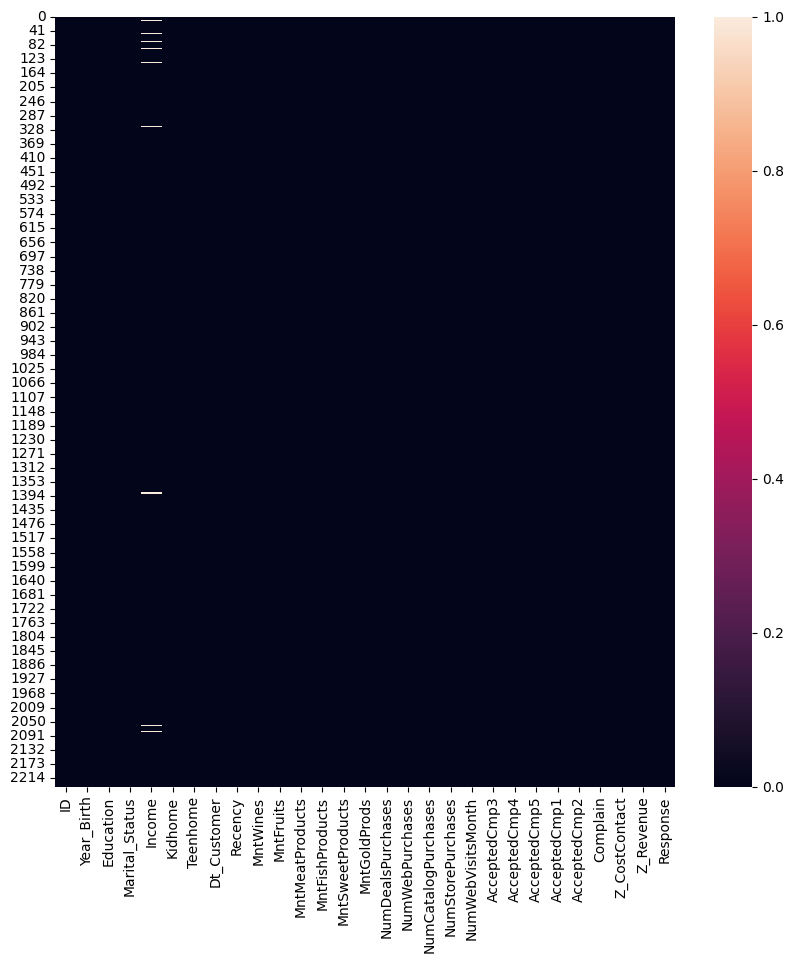

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

In [9]:
#Menampilkan data yang missing value
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [10]:
# Drop missing value pada kolom income
df.dropna(inplace=True)

Kita sudah drop missing value sehingga barisnya menjadi 2216 dari 2240 baris

Kita cek berapa banyak income yang berada diatas 200000

In [11]:
df[df['Income']>200000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


Dari sini dapat kita lihat bahwa terdapat satu data outlier yang sangat jauh, dimana orang tersebut hanyalah lulusan S1 tp memiliki penghasilan 13 x lipat dari penghasilan rata-rata yang secara logika merupakan hal yang sangat aneh. Selain itu, dapat kita lihat bahwa user tersebut telah bergabung semenjak 2013 tapi jumlah transaksi yang cendrung minim sehingga tidak akan terlalu berpengaruh signifikan pada dataset. Oleh karena itu, diputuskan untuk melakukan drop pada data tersebut.

In [12]:
df=df.drop(index=2233)
df.shape

(2215, 29)

Pada data awal, kolom ID memiliki tipe data integer, Dt_Customer merupakan data dengan format 'object', Sekarang akan coba dilakukan casting dari tipe 'object' menjadi 'date' agar dapat dilakukan analisis time series nantinya

In [13]:
df['ID'] = df['ID'].apply(str)
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'],dayfirst=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2215 non-null   object        
 1   Year_Birth           2215 non-null   int64         
 2   Education            2215 non-null   object        
 3   Marital_Status       2215 non-null   object        
 4   Income               2215 non-null   float64       
 5   Kidhome              2215 non-null   int64         
 6   Teenhome             2215 non-null   int64         
 7   Dt_Customer          2215 non-null   datetime64[ns]
 8   Recency              2215 non-null   int64         
 9   MntWines             2215 non-null   int64         
 10  MntFruits            2215 non-null   int64         
 11  MntMeatProducts      2215 non-null   int64         
 12  MntFishProducts      2215 non-null   int64         
 13  MntSweetProducts     2215 non-null   i

In [15]:
#Melakukan drop 2 kolom yang tidak diperlukan
df.drop(columns=['Z_CostContact', 'Z_Revenue'],axis=1, inplace=True)

In [16]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [17]:
df.shape

(2215, 27)

In [18]:
pd.set_option('display.max_colwidth', 1)
listItem = []
for i in df.columns :
    if i == 'Dt_Customer' :
        listItem.append( [i, df[i].nunique(), df[i].apply(lambda i : i.date()).unique()])
    else :
        listItem.append( [i, df[i].nunique(), df[i].unique()])



dfUnik = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
dfUnik

,Column Name,Number of Unique,Unique Sample
0,ID,2215,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 2139, 1371, 9909, 7286, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 11178, 2230, 7516, 7247, 11100, 4646, 3037, 1473, 1016, 4518, 9370, 8908, 8373, 7533, 2683, 3629, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1983, 1945, 1991, 1962, 1953, 1956, 1992, 1961, 1900, 1986, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1973,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, 68126.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,662,"[2012-09-04, 2014-03-08, 2013-08-21, 2014-02-10, 2014-01-19, 2013-09-09, 2012-11-13, 2013-05-08, 2013-06-06, 2014-03-13, 2013-11-15, 2012-10-10, 2012-11-24, 2012-12-24, 2012-08-31, 2013-03-28, 2012-11-03, 2012-08-08, 2013-01-06, 2012-12-23, 2014-01-11, 2013-03-18, 2013-01-02, 2013-05-27, 2013-05-31, 2013-11-22, 2014-05-22, 2013-05-11, 2012-10-29, 2013-02-20, 2013-08-29, 2013-12-31, 2013-09-02, 2014-02-11, 2013-02-01, 2013-04-29, 2013-03-12, 2013-10-02, 2014-06-28, 2012-11-09, 2013-05-24, 2012-11-08, 2014-05-12, 2012-08-11, 2014-06-07, 2013-06-12, 2012-11-19, 2013-04-02, 2014-04-28, 2014-03-03, 2013-07-04, 2012-09-07, 2013-02-18, 2013-06-11, 2013-12-06, 2013-05-21, 2014-05-11, 2014-03-19, 2013-09-27, 2013-04-08, 2012-09-11, 2013-03-17, 2013-04-05, 2014-04-30, 2012-12-19, 2012-08-27, 2012-10-12, 2013-09-04, 2012-08-29, 2013-06-23, 2013-07-03, 2014-02-25, 2013-08-11, 2013-07-16, 2014-05-28, 2014-01-21, 2014-03-23, 2014-05-24, 2012-11-22, 2013-04-11, 2013-12-01, 2013-06-20, 2013-07-23, 2014-03-30, 2013-04-20, 2013-05-17, 2014-05-08, 2013-12-10, 2013-09-24, 2013-02-02, 2012-12-07, 2013-11-02, 2012-11-10, 2014-06-25, 2012-12-12, 2013-09-10, 2014-01-24, 2013-02-19, 2013-07-11, 2013-11-14, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 40, 9, 87, 5, 95, 48, 70, 79, 84, 44, 43, 35, 15, 17, 46, 27, 25, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 80, 45, 14, 52, 93, 50, 60, 11, 66, 97, 62, 6, 33, 22, 71, 67, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 123, 826, 245, 650, 12, 510, 328, 984,

Setelah melihat nilai unik pada setiap kolom, ditemukan adanya beberapa istilah yang tidak umum, yang akan dibahas satu persatu dibawah untuk melakukan perubahan agar data menjadi lebih simple tanpa kehilangan makna dari istilah tersebut :

## Education & Marital Status

In [19]:
#Menampilkan 2n Cycle yang berada dikolom education
df[df['Education']=='2n Cycle']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
19,2278,1985,2n Cycle,Single,33812.0,1,0,2012-11-03,86,4,17,19,30,24,39,2,2,1,3,6,0,0,0,0,0,0,0
37,10755,1976,2n Cycle,Married,23718.0,1,0,2013-09-02,76,6,3,14,15,7,36,3,3,1,2,7,0,0,0,0,0,0,0
46,9909,1996,2n Cycle,Married,7500.0,0,0,2012-11-09,24,3,18,14,15,22,50,3,3,1,3,9,0,0,0,0,0,0,1
67,9369,1979,2n Cycle,Single,88194.0,0,1,2014-03-19,19,688,14,309,201,24,38,1,11,10,10,5,1,0,0,1,0,0,1
78,10401,1976,2n Cycle,Together,26326.0,0,0,2013-09-04,12,1,0,5,0,3,9,1,0,0,3,3,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,8207,1957,2n Cycle,Married,53233.0,0,1,2014-03-18,18,28,0,9,3,0,0,1,1,0,3,4,0,0,0,0,0,0,0
2193,8722,1957,2n Cycle,Married,82347.0,0,0,2012-11-06,38,556,54,845,202,133,63,1,7,7,10,3,1,0,0,1,0,0,1
2210,607,1955,2n Cycle,Divorced,41769.0,0,1,2013-02-13,31,302,29,131,32,0,27,6,8,1,7,8,0,0,0,0,0,0,0
2213,3661,1995,2n Cycle,Single,80617.0,0,0,2012-10-12,42,594,51,631,72,55,32,1,4,6,8,2,0,0,0,0,0,0,0


In [20]:
#menampilkan absurd dan yolo yang berada di kolom marital status
df[(df['Marital_Status']=='Absurd') | (df['Marital_Status']=='YOLO')]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,0
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,1


In [21]:
#mengubah isi kolom education dengan istilah yang lebih mudah dipahami
df.Education = df.Education.replace({'2n Cycle' : 'Master',
                                     'Basic' : 'Non-Graduate',
                                     'Graduation' : 'Undergraduate'})
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Undergraduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Undergraduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Undergraduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Undergraduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Undergraduate,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Undergraduate,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [22]:
#mengubah isi dikolom marital status dengan istilah yang lebih mudah dipahami
df.Marital_Status = df.Marital_Status.replace({'Together': 'Married',
                                                           'Widow': 'Divorced', 
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Undergraduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Undergraduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Undergraduate,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Undergraduate,Married,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Undergraduate,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Married,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Undergraduate,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


## Klasifikasi Usia

In [23]:
# Menambahkan kolom Age
df['Age']= 2014 - df.Year_Birth
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Undergraduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57
1,2174,1954,Undergraduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60
2,4141,1965,Undergraduate,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49
3,6182,1984,Undergraduate,Married,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33


In [24]:
def rangeumur (int) :
    if int < 25 :
        return '15 - 25'
    elif 25 <= int <= 35 :
        return '26 - 35'
    elif 35 < int <= 45 :
        return '36 - 45'
    elif 45 < int <= 55 :
        return '46 - 55'
    elif 55 < int <= 65 :
        return '56 - 65' 
    else :
        return '> 66'

In [25]:
#manambah kolom Age Range untuk memudahkan analisis data
df['Age_Range'] = df['Age'].apply(rangeumur)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Range
0,5524,1957,Undergraduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,56 - 65
1,2174,1954,Undergraduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,56 - 65
2,4141,1965,Undergraduate,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,46 - 55
3,6182,1984,Undergraduate,Married,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,26 - 35
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,26 - 35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Undergraduate,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47,46 - 55
2236,4001,1946,PhD,Married,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68,> 66
2237,7270,1981,Undergraduate,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33,26 - 35
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58,56 - 65


## Penambahan Kolom total_People

In [26]:
#melakukan penambahan kolom total people guna untuk mengetahui jumlah orang atau keluarga.
df.insert(7,'Total_People',df['Marital_Status'].apply(lambda x : 2 if x == 'Married' else 1)+df['Kidhome']+df['Teenhome'])
df.head(4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Total_People,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Range
0,5524,1957,Undergraduate,Single,58138.0,0,0,1,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,56 - 65
1,2174,1954,Undergraduate,Single,46344.0,1,1,3,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,56 - 65
2,4141,1965,Undergraduate,Married,71613.0,0,0,2,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,46 - 55
3,6182,1984,Undergraduate,Married,26646.0,1,0,3,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,26 - 35


## Penambahan Kolom total_Spent

In [27]:
#melakukan penambahan kolom total spent untuk mengetahui jumlah pengeluaran dari tiap customer
df.insert(17,'Total_Spent',df['MntWines']+df['MntMeatProducts']+df['MntMeatProducts']+df['MntSweetProducts']+df['MntGoldProds'])
df.head(4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Total_People,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,Total_Spent,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Range
0,5524,1957,Undergraduate,Single,58138.0,0,0,1,2012-09-04,58,635,88,546,172,88,88,3,1903,8,10,4,7,0,0,0,0,0,0,1,57,56 - 65
1,2174,1954,Undergraduate,Single,46344.0,1,1,3,2014-03-08,38,11,1,6,2,1,6,2,30,1,1,2,5,0,0,0,0,0,0,0,60,56 - 65
2,4141,1965,Undergraduate,Married,71613.0,0,0,2,2013-08-21,26,426,49,127,111,21,42,1,743,8,2,10,4,0,0,0,0,0,0,0,49,46 - 55
3,6182,1984,Undergraduate,Married,26646.0,1,0,3,2014-02-10,26,11,4,20,10,3,5,2,59,2,0,4,6,0,0,0,0,0,0,0,30,26 - 35


## Penambahan Kolom Campaign Taken

In [28]:
#melakukan penambahan kolom campaign taken untuk mengetahui jumlah promo yang diambil oleh customer
df['Campaign_Taken'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

In [29]:
df = df[['ID', 'Year_Birth', 'Age', 'Age_Range', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Total_People', 'Dt_Customer',	'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Spent', 'NumDealsPurchases', 'NumWebPurchases',	'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Campaign_Taken']]
df

,ID,Year_Birth,Age,Age_Range,Education,Marital_Status,Income,Kidhome,Teenhome,Total_People,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Campaign_Taken
0,5524,1957,57,56 - 65,Undergraduate,Single,58138.0,0,0,1,2012-09-04,58,635,88,546,172,88,88,1903,3,8,10,4,7,0,0,0,0,0,0,1,1
1,2174,1954,60,56 - 65,Undergraduate,Single,46344.0,1,1,3,2014-03-08,38,11,1,6,2,1,6,30,2,1,1,2,5,0,0,0,0,0,0,0,0
2,4141,1965,49,46 - 55,Undergraduate,Married,71613.0,0,0,2,2013-08-21,26,426,49,127,111,21,42,743,1,8,2,10,4,0,0,0,0,0,0,0,0
3,6182,1984,30,26 - 35,Undergraduate,Married,26646.0,1,0,3,2014-02-10,26,11,4,20,10,3,5,59,2,2,0,4,6,0,0,0,0,0,0,0,0
4,5324,1981,33,26 - 35,PhD,Married,58293.0,1,0,3,2014-01-19,94,173,43,118,46,27,15,451,5,5,3,6,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,47,46 - 55,Undergraduate,Married,61223.0,0,1,3,2013-06-13,46,709,43,182,42,118,247,1438,2,9,3,4,5,0,0,0,0,0,0,0,0
2236,4001,1946,68,> 66,PhD,Married,64014.0,2,1,5,2014-06-10,56,406,0,30,0,0,8,474,7,8,2,5,7,0,0,0,1,0,0,0,1
2237,7270,1981,33,26 - 35,Undergraduate,Divorced,56981.0,0,0,1,2014-01-25,91,908,48,217,32,12,24,1378,1,2,3,13,6,0,1,0,0,0,0,0,1
2238,8235,1956,58,56 - 65,Master,Married,69245.0,0,1,3,2014-01-24,8,428,30,214,80,30,61,947,2,6,5,10,3,0,0,0,0,0,0,0,0


In [30]:
#Mengurutkan Kolom
df = df[['ID', 'Year_Birth', 'Age', 'Age_Range', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Total_People', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Spent', 'NumDealsPurchases', 'NumWebPurchases',	'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Campaign_Taken']]
df

,ID,Year_Birth,Age,Age_Range,Education,Marital_Status,Income,Kidhome,Teenhome,Total_People,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Campaign_Taken
0,5524,1957,57,56 - 65,Undergraduate,Single,58138.0,0,0,1,2012-09-04,58,635,88,546,172,88,88,1903,3,8,10,4,7,0,0,0,0,0,0,1,1
1,2174,1954,60,56 - 65,Undergraduate,Single,46344.0,1,1,3,2014-03-08,38,11,1,6,2,1,6,30,2,1,1,2,5,0,0,0,0,0,0,0,0
2,4141,1965,49,46 - 55,Undergraduate,Married,71613.0,0,0,2,2013-08-21,26,426,49,127,111,21,42,743,1,8,2,10,4,0,0,0,0,0,0,0,0
3,6182,1984,30,26 - 35,Undergraduate,Married,26646.0,1,0,3,2014-02-10,26,11,4,20,10,3,5,59,2,2,0,4,6,0,0,0,0,0,0,0,0
4,5324,1981,33,26 - 35,PhD,Married,58293.0,1,0,3,2014-01-19,94,173,43,118,46,27,15,451,5,5,3,6,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,47,46 - 55,Undergraduate,Married,61223.0,0,1,3,2013-06-13,46,709,43,182,42,118,247,1438,2,9,3,4,5,0,0,0,0,0,0,0,0
2236,4001,1946,68,> 66,PhD,Married,64014.0,2,1,5,2014-06-10,56,406,0,30,0,0,8,474,7,8,2,5,7,0,0,0,1,0,0,0,1
2237,7270,1981,33,26 - 35,Undergraduate,Divorced,56981.0,0,0,1,2014-01-25,91,908,48,217,32,12,24,1378,1,2,3,13,6,0,1,0,0,0,0,0,1
2238,8235,1956,58,56 - 65,Master,Married,69245.0,0,1,3,2014-01-24,8,428,30,214,80,30,61,947,2,6,5,10,3,0,0,0,0,0,0,0,0


## Mengubah Nama Kolom

In [31]:
#melakukan pengubahan nama kolom agar lebih mudah dipahami
df = df.rename(columns={'Total_Spent' : 'Total Spent', 
                        'Year_Birth' : 'Year Birth', 
                        'Dt_Customer':'Member_Date',
                        'MntWines': 'Wines',
                        'MntFruits' : 'Fruits',
                        'MntMeatProducts' : 'Meat Products',
                        'MntFishProducts' : 'Fish Products',
                        'MntSweetProducts' : 'Sweet Products',
                        'MntGoldProds' : 'Gold Products',
                        'AcceptedCmp1' : 'Campaign1',
                        'AcceptedCmp2' : 'Campaign2',
                        'AcceptedCmp3' : 'Campaign3',
                        'AcceptedCmp4' : 'Campaign4',
                        'AcceptedCmp5' : 'Campaign5',
                        'Campaign_Taken' : 'Campaign Taken'})
df

,ID,Year Birth,Age,Age_Range,Education,Marital_Status,Income,Kidhome,Teenhome,Total_People,Member_Date,Recency,Wines,Fruits,Meat Products,Fish Products,Sweet Products,Gold Products,Total Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Response,Campaign Taken
0,5524,1957,57,56 - 65,Undergraduate,Single,58138.0,0,0,1,2012-09-04,58,635,88,546,172,88,88,1903,3,8,10,4,7,0,0,0,0,0,0,1,1
1,2174,1954,60,56 - 65,Undergraduate,Single,46344.0,1,1,3,2014-03-08,38,11,1,6,2,1,6,30,2,1,1,2,5,0,0,0,0,0,0,0,0
2,4141,1965,49,46 - 55,Undergraduate,Married,71613.0,0,0,2,2013-08-21,26,426,49,127,111,21,42,743,1,8,2,10,4,0,0,0,0,0,0,0,0
3,6182,1984,30,26 - 35,Undergraduate,Married,26646.0,1,0,3,2014-02-10,26,11,4,20,10,3,5,59,2,2,0,4,6,0,0,0,0,0,0,0,0
4,5324,1981,33,26 - 35,PhD,Married,58293.0,1,0,3,2014-01-19,94,173,43,118,46,27,15,451,5,5,3,6,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,47,46 - 55,Undergraduate,Married,61223.0,0,1,3,2013-06-13,46,709,43,182,42,118,247,1438,2,9,3,4,5,0,0,0,0,0,0,0,0
2236,4001,1946,68,> 66,PhD,Married,64014.0,2,1,5,2014-06-10,56,406,0,30,0,0,8,474,7,8,2,5,7,0,0,0,1,0,0,0,1
2237,7270,1981,33,26 - 35,Undergraduate,Divorced,56981.0,0,0,1,2014-01-25,91,908,48,217,32,12,24,1378,1,2,3,13,6,0,1,0,0,0,0,0,1
2238,8235,1956,58,56 - 65,Master,Married,69245.0,0,1,3,2014-01-24,8,428,30,214,80,30,61,947,2,6,5,10,3,0,0,0,0,0,0,0,0


## Data Telah Bersih

Dataset sudah selesai dibersihkan, serta sudah dilakukan penambahan kolom dan penghapusan kolom, yang awalnya dataset berisi 2240 rows dan 29 columns menjadi 2215 rows dan 32  columns.

## Ringkasan Data Secara Keseluruhan

In [32]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),df[col].nunique(), list(df[col].sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2215, 32)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,object,0,2215,"[640, 1490]"
1,Year Birth,int64,0,59,"[1981, 1968]"
2,Age,int64,0,59,"[39, 49]"
3,Age_Range,object,0,6,"[46 - 55, 36 - 45]"
4,Education,object,0,4,"[PhD, PhD]"
5,Marital_Status,object,0,3,"[Married, Single]"
6,Income,float64,0,1973,"[73395.0, 59184.0]"
7,Kidhome,int64,0,3,"[1, 0]"
8,Teenhome,int64,0,3,"[0, 1]"
9,Total_People,int64,0,5,"[3, 3]"


Data yang awalnya terdiri dari 2240 baris dan 29 kolom, sekarang menjadi 2215 baris dan 32 kolom, karena 2 kolom telah di drop kemudian 5 kolom telah ditambah untuk mempermudah analisis, dan 24 missing value telah dilakukan penghapusan serta 1 baris outlier pada kolom income telah dihapus.

In [33]:
df.to_excel('Supermarket_Customer.xlsx')

## Data Analisis

Sebelum melakukan analisis berdasarkan kriteria tertentu, kita akan mengecek distribusi data untuk setiap kolom numerikal untuk melihat apakah ada sesuatu yang menarik dari distribusi datanya. Kita akan menggunakan histplot agar mendapatkan gambaran distribusi tersebut

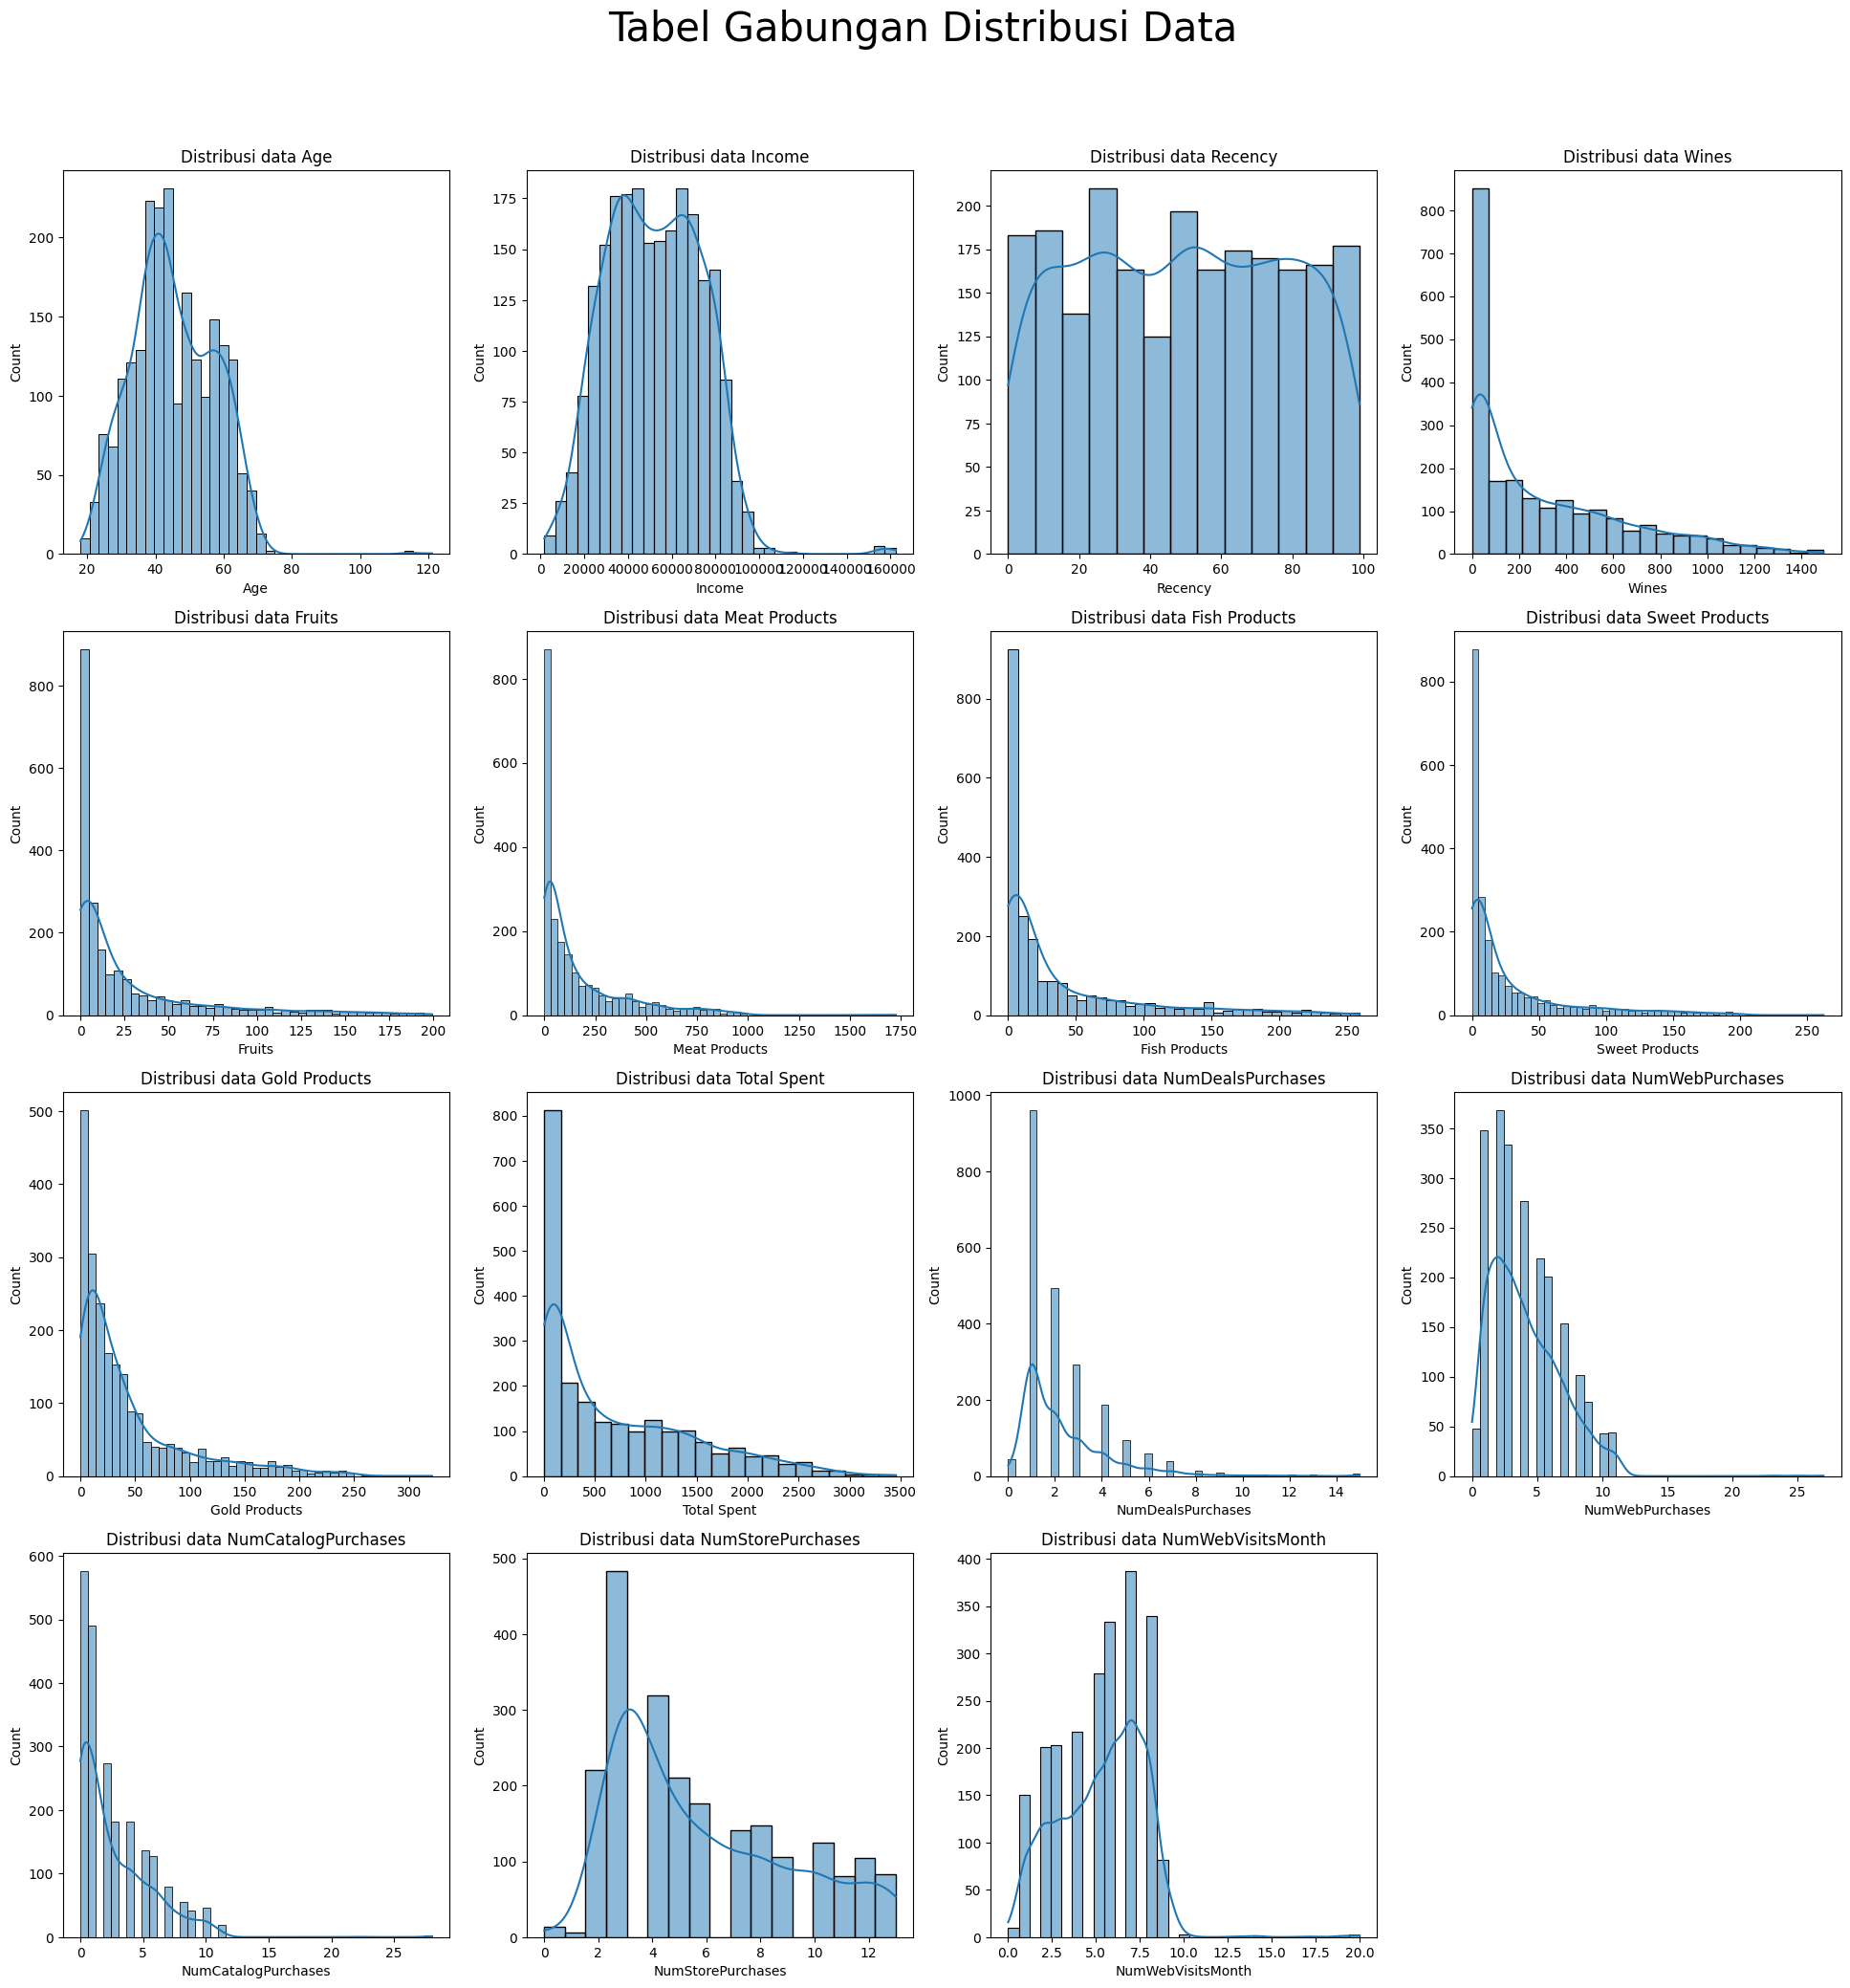

In [34]:
# membuat list kolom yang akan dilihat distribusi datanya dengan Boxplot
listKolom = ['Age','Income','Recency','Wines','Fruits','Meat Products','Fish Products','Sweet Products','Gold Products','Total Spent','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
kolom=0
n_cols=4
n_rows=4
plt.figure(figsize=(24,24))
for i in range(n_rows) :
    for j in range(n_cols) :
        if kolom==15 : # karena hanya ada 14 data, maka akan dibreak ketika kolom==14
            break
        else :
            plt.subplot(n_rows,n_cols,kolom+1)
            sns.histplot(data=df, x=listKolom[kolom], kde=True)
            plt.title(f'Distribusi data {listKolom[kolom]}')
            kolom+=1

plt.suptitle('Tabel Gabungan Distribusi Data', size=30, y=0.95)
plt.show()

**Analisis**

1. Kolom age dan income menunjukkan distribusi yang mengikuti kurva bell pada distribusi normal (akan dicek normalitasnya di sesi selanjutnya).
2. Kolom spent setiap produk dan total spent menunjukkan kurva yang memiliki central of tendency didaerah 0. Hal ini disebabkan karena banyak user yang mungkin tidak membeli produk tertentu sama sekali, tapi membeli produk lainnya.
3. Kolom lainnya menunjukkan distribusi yang cukup acak yang nantinya akan dicek normalitasnya.

**Cek Normalitas**

Karena data hanya memiliki 2215 baris (< 5000 baris), untuk uji normalitas dipakai metode saphiro karena lebih akurat

In [35]:
listpvalue = []
listStatusNormal = []

for i in listKolom :
    stat,pvalue=shapiro(df[i])
    if pvalue>=0.05:
        status = 'Terdistribusi normal' #fail to reject Ho
    else: 
        status = 'Tidak terdistribusi normal' #reject Ho (Ha)
    listpvalue.append(pvalue)
    listStatusNormal.append(status)

In [36]:
dfNormalitas = pd.DataFrame({
    'Kolom' : listKolom,
    'pvalue' : listpvalue,
    'Status_Normalitas' : listStatusNormal
})
dfNormalitas

,Kolom,pvalue,Status_Normalitas
0,Age,4.975493e-19,Tidak terdistribusi normal
1,Income,3.512707e-19,Tidak terdistribusi normal
2,Recency,8.861515e-26,Tidak terdistribusi normal
3,Wines,1.049573e-42,Tidak terdistribusi normal
4,Fruits,0.000000e+00,Tidak terdistribusi normal
5,Meat Products,0.000000e+00,Tidak terdistribusi normal
6,Fish Products,0.000000e+00,Tidak terdistribusi normal
7,Sweet Products,0.000000e+00,Tidak terdistribusi normal
8,Gold Products,0.000000e+00,Tidak terdistribusi normal
9,Total Spent,1.203015e-41,Tidak terdistribusi normal


**Analisis**

Seperti yang telah diuji diatas dataset kita tidak ada yang terdistribusi normal

Semua uji statistik yang akan dilanjutkan pada analisis selanjutnya akan menggunakan uji non-parametrik

Maka akan digunakan median sebagai paramater rata-rata

## Analisis Produk dan Karakteristik Konsumen

Selanjutnya akan dilakukan analisis jenis produk berdasarkan beberapa parameter seperti Age, Education, Marital Status, dan juga Total People

**Analisis Pemasukan dari Setiap Produk**

Sebagai gambaran awal, akan coba dilihat persebaran pembelian tiap jenis produk selama dua tahun terakhir

In [77]:
SpentProduct=df[['Wines','Fruits','Meat Products','Fish Products','Sweet Products','Gold Products']].sum()
dfSpentProduct=pd.DataFrame(SpentProduct).reset_index().rename(columns={'index' : 'Produk', 0 : 'Money_Spent'}).sort_values(by='Money_Spent',ascending=False)
dfSpentProduct['Grand_Money_Spent'] = dfSpentProduct['Money_Spent'].sum()
dfSpentProduct['Persentase'] = (dfSpentProduct['Money_Spent']/dfSpentProduct['Grand_Money_Spent']).round(3)*100
dfSpentProduct

,Produk,Money_Spent,Grand_Money_Spent,Persentase
0,Wines,676074,1345217,50.3
2,Meat Products,370045,1345217,27.5
5,Gold Products,97415,1345217,7.2
3,Fish Products,83397,1345217,6.2
4,Sweet Products,59895,1345217,4.5
1,Fruits,58391,1345217,4.3


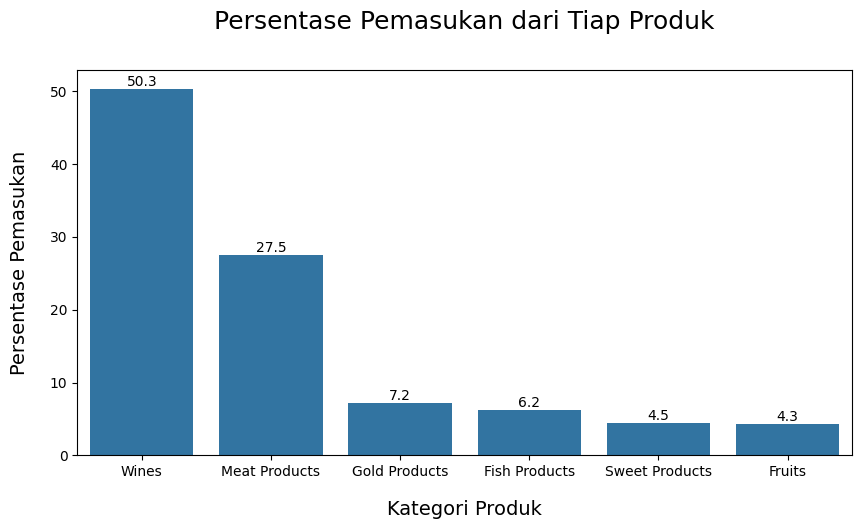

In [78]:
plt.figure(figsize=(10,5))
plot=sns.barplot(data = dfSpentProduct, x='Produk', y='Persentase')
plt.xlabel('Kategori Produk', size=14, labelpad=15)
plt.ylabel('Persentase Pemasukan', size=14, labelpad=15)
plt.title('Persentase Pemasukan dari Tiap Produk',size=18,pad=30)
plot.bar_label(plot.containers[0],label_type='edge')
plt.show()

**Analisis**

1. penghasilan terbesar supermarket (sekitar 85% dari pendapatan perusahaan) berasal dari wine, kemudian diikuti oleh produk daging, dan kemudian emas. Jika kita generalisir, orang-orang lebih banyak mengeluarkan uangnya untuk hiburan (wine), kemudian kebutuhan pangan (daging), dan kemudian investasi (emas).

2. Dari data ini juga terlihat bahwa pembelian buah-buahan sangat sedikit (4.3% dari revenue supermarket). Padahal buah termasuk produk yang beresiko dan membutuhkan pengamanan tinggi (harus memakai freezer). Oleh karena itu bisa dipertimbangkan untuk menghilangkan buah dari daftar produk supermarket.

**Analisis Pemasukan berdasarkan Beberapa Parameter**

setelah itu, akan coba dilihat distribusi pembelian produk berdasarkan masing-masing parameter

## Analisis Produk Berdasarkan Rentang Umur

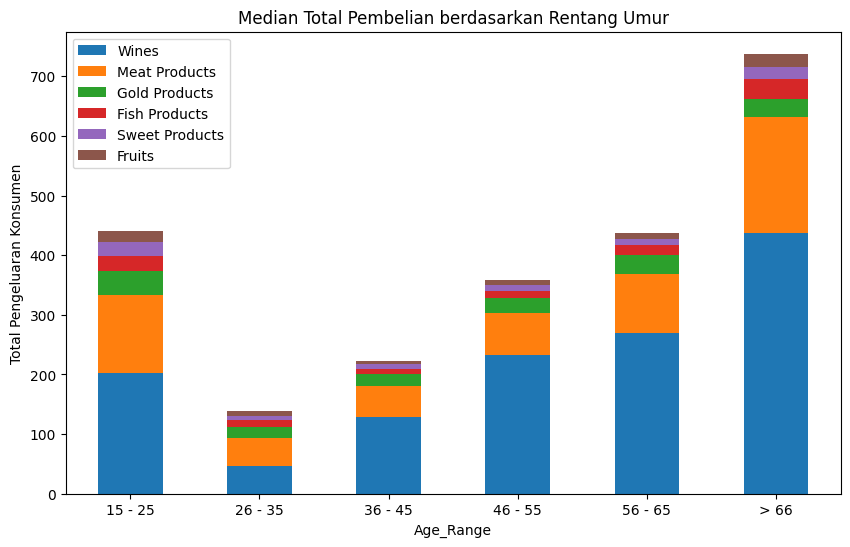

In [37]:
# Melihat pengeluaran orang-orang di supermarket berdasarkan rentang umur
dfbyAgeRange=df.groupby('Age_Range')[['Wines','Meat Products','Gold Products','Fish Products','Sweet Products','Fruits']].median()
dfbyAgeRange.plot(kind='bar', stacked=True,figsize=(10,6))
plt.title('Median Total Pembelian berdasarkan Rentang Umur')
plt.ylabel('Total Pengeluaran Konsumen')
plt.xticks(rotation=0)
plt.show()

**Analisis**

1. Secara umum, setiap umur memiliki trend pengeluaran yang sama, yaitu wine, kemudian diikuti dengan produk daging, kemudian diikuti dengan produk emas. Hal ini berarti prioritas orang-orang baik yang sudah menikah, sudah bercerai, maupun yang masih single, adalah hiburan (wine), kemudian kebutuhan pangan (daging), dan kemudian investasi (emas).
2. Pada orang-orang yang berumur 66 tahun keatas, mereka cendrung membeli lebih banyak produk ikan dibandingkan produk emas. Hal ini dikarenakan orang-orang pada lanjut usia lebih memperhatikan aspek kesehatan sehingga mereka mulai beralih ke makanan yang lebih sehat seperti ikan untuk menjaga kesehatannya
3. Berdasarkan umur, pembelian paling banyak dilakukan oleh orang-orang yang berumur >66 tahun, kemudian diikuti oleh orang-orang berumur 15 - 25 tahun. Jika dilihat dari usia produktif (usia bekerja), rata-rata orang bekerja dari umur 26 - 65 tahun. Yang artinya perilaku konsumtif orang pada usia produktif cendrung lebih rendah dibandingkan orang dengan usia non-produktif
4. Secara logika, orang berumur 15 - 25 tahun harusnya belum memiliki banyak pengeluaran karena mayoritas masih single dan juga belum punya anak, hal ini mungkin dikarenakan orang pada usia tersebut masih mendapatkan uang dari orang tua dan cendrung lebih konsumtif karena ingin mengikuti trend
5. Untuk orang yang berada pada usia produktif, diawal karir (umur 26-35) mereka cendrung sangat berhemat dan juga belum memiliki anak ataupun masih punya anak yang sedikit. Seiring umur bertambah, dikarenakan oleh berbagai faktor (penghasilan yang semakin naik dan jumlah orang dirumah yang bertambah), dapat dikatakan bahwa semakin tua seseorang, merekapun menjadi semakin konsumtif.

Karena kita banyak mengaitkan faktor antara rentang umur dan income, maka kita akan mencoba melihat hubungan antara umur dan juga income :

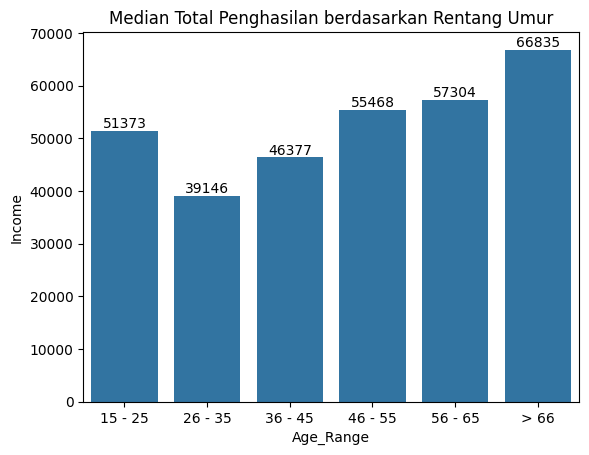

In [38]:
plot=sns.barplot(data = df.groupby('Age_Range',as_index=False)[['Income']].median(), x='Age_Range', y='Income')
plot.bar_label(plot.containers[0],label_type='edge')
plt.title('Median Total Penghasilan berdasarkan Rentang Umur')
plt.show()

**Analisis**

1. Dapat dilihat bahwa pola grafik rentang umur penghasilan memiliki pola yang sama dengan grafik rentang umur pengeluaran. Dimana semakin tua umur, maka penghasilan juga akan naik. Tetapi kita menemukan sesuatu yang unik dimana penghasilan orang berumur 15-25 tahun cukup tinggi. Tidak heran jika mereka menjadi konsumtif. Tetapi ada kemungkinan bahwa mereka masih mendapatkan bantuan orangtua untuk pendanaan, bukan pure dari hasil bekerja saja.
2. Kesimpulan secara umumnya adalah semakin tua seseorang, maka penghasilan mereka cendrung naik dan perilaku mereka juga menjadi semakin konsumtif.

## Analisis Produk Berdasarkan Jenjang Pendidikan

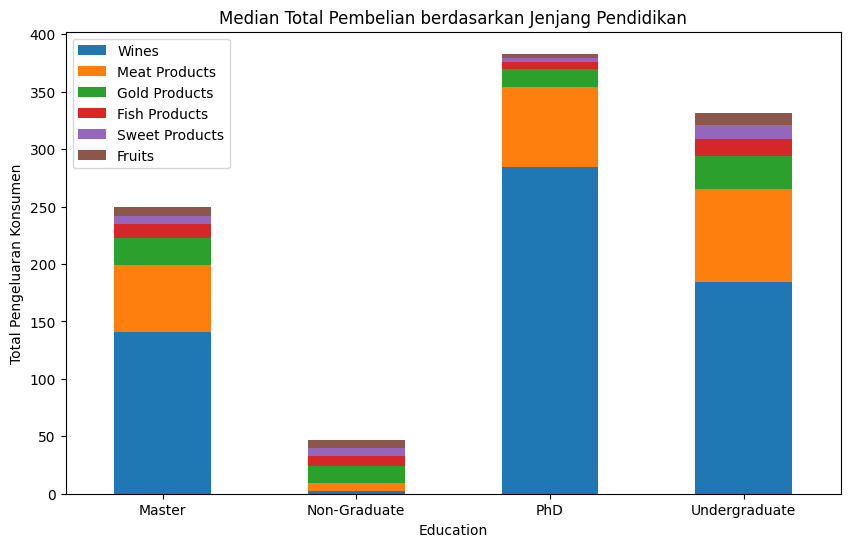

In [39]:
# Melihat pengeluaran orang-orang di supermarket berdasarkan Jenjang Pendidikan
dfbyMaritalStatus=df.groupby('Education')[['Wines','Meat Products','Gold Products','Fish Products','Sweet Products','Fruits']].median()
dfbyMaritalStatus.plot(kind='bar', stacked=True,figsize=(10,6))
plt.title('Median Total Pembelian berdasarkan Jenjang Pendidikan')
plt.ylabel('Total Pengeluaran Konsumen')
plt.yticks(range(0,450,50))
plt.xticks(rotation=0)
plt.show()

**Analisis**

1. Secara general, 3 kategori produk favorit setiap jenjang pendidikan masih sama, yaitu wine, produk daging, dan emas.
2. Pada kelompok customer yang tidak menempuh pendidikan sarjana (non-graduate), justru terlihat bahwa prioritas mereka adalah produk investasi (emas), kemudian kebutuhan pangan (produk daging dan produk ikan).

Karena kita banyak mengaitkan faktor antara jenjang pendidikan dan income, maka kita akan mencoba melihat hubungan antara pendidikan dan juga income :

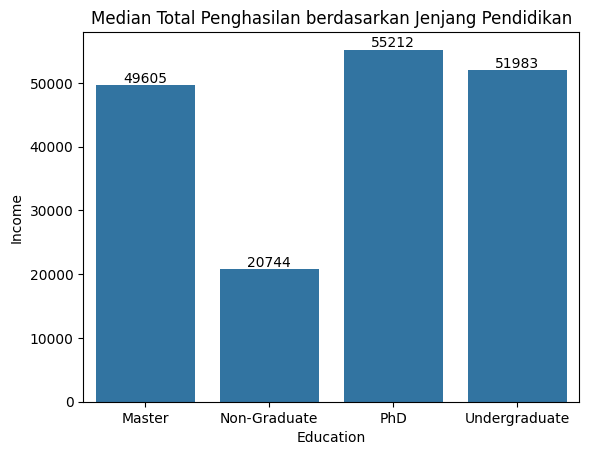

In [40]:
plot=sns.barplot(data = df.groupby('Education',as_index=False)[['Income']].median(), x='Education', y='Income')
plot.bar_label(plot.containers[0],label_type='edge')
plt.title('Median Total Penghasilan berdasarkan Jenjang Pendidikan')
plt.show()

**Analisis**

1. Dapat dilihat bahwa pola grafik pendidikan-penghasilan memiliki pola yang sama dengan grafik pendidikan-pengeluaran. Dimana semakin tinggi pendidikan seseorang, penghasilannya juga cenderung semakin besar. Hal ini juga menjawab pertanyaan kenapa pada orang yang berpendidikan tidak sarjana, memiliki prioritas berbelanja yang beda dari yang lainnya, hal ini disebabkan mereka tidak punya cukup uang untuk menghabiskannya dengan produk hiburan (wine), sehingga lebih mengutamakan kebutuhan investasi dan pangan
2. Kesimpulan secara umumnya adalah semakin tinggi pendidikan seseorang, maka penghasilan mereka cendrung naik dan perilaku mereka juga menjadi semakin konsumtif

## Analisis Produk Berdasarkan Status Pernikahan

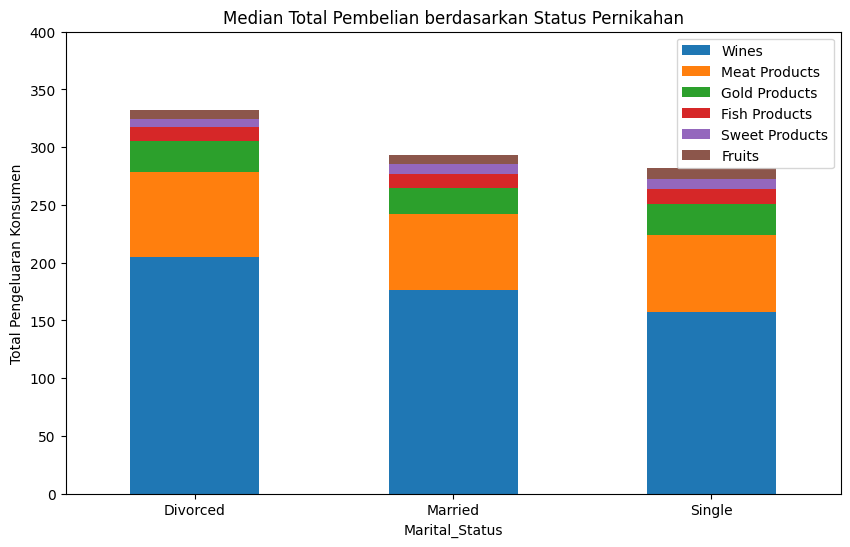

In [41]:
# Melihat pengeluaran orang-orang di supermarket berdasarkan Status Pernikahan
dfbyMaritalStatus=df.groupby('Marital_Status')[['Wines','Meat Products','Gold Products','Fish Products','Sweet Products','Fruits']].median()
dfbyMaritalStatus.plot(kind='bar', stacked=True,figsize=(10,6))
plt.title('Median Total Pembelian berdasarkan Status Pernikahan')
plt.ylabel('Total Pengeluaran Konsumen')
plt.yticks(range(0,450,50))
plt.xticks(rotation=0)
plt.show()

**Analisis**

1. Secara general, 3 kategori produk favorit dari setiap jenis status pernikahan adalah sama, yaitu wine, produk daging, dan emas. Hal ini berarti prioritas orang-orang baik yang sudah menikah, sudah bercerai, maupun yang masih single, adalah hiburan (wine), kemudian kebutuhan pangan (daging), dan kemudian investasi (emas)
2. Dari data ini, orang yang paling banyak menghabiskan uangnya adalah orang-orang yang sudah bercerai, kemudian orang-orang yang berpasangan (menikah), kemudian yang terakhir adalah orang-orang berstatus single. Kalau kita lihat sekilas, perbedaan yang cukup signifikan terlihat pada total pengeluaran untuk wine. Berhubung wine biasanya diminum untuk meredakan stress, kita dapat mengatakan bahwa orang yang sudah bercerai memiliki tingkat stress yang lebih tinggi, kemudian diikuti oleh orang berpasangan, dan yang paling akhir adalah orang-orang dengan status single

## Analisis Produk Berdasarkan Jumlah Orang Dirumah

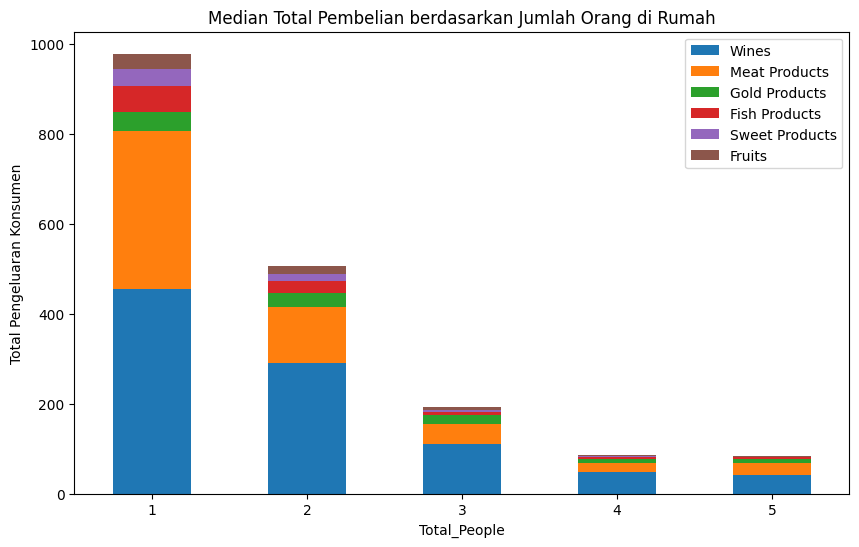

In [42]:
# Melihat pengeluaran orang-orang di supermarket berdasarkan Jumlah Orang Dirumah
dfbyMaritalStatus=df.groupby('Total_People')[['Wines','Meat Products','Gold Products','Fish Products','Sweet Products','Fruits']].median()
dfbyMaritalStatus.plot(kind='bar', stacked=True,figsize=(10,6))
plt.title('Median Total Pembelian berdasarkan Jumlah Orang di Rumah')
plt.ylabel('Total Pengeluaran Konsumen')
plt.xticks(rotation=0)
plt.show()

**Analisis**

1. Secara general, 3 kategori produk favorit dari setiap kategori jumlah orang dirumah adalah sama, yaitu wine, produk daging, dan emas. Yang berarti prioritas orang-orang berbelanja di supermarket ini adalah hiburan (wine), kemudian kebutuhan pangan (daging), dan kemudian investasi (emas)
2. Orang yang tinggal sendiri dirumah cenderung lebih banyak membeli produk ikan
3. Dapat dilihat bahwa terdapat sesuatu yang unik dimana semakin banyak jumlah orang dirumah, justru pengeluarannya semakin mengecil. Pengeluaran paling besar dihabiskan oleh orang yang sendiri (single)

## Analisis Promo

Selanjutnya akan dilakukan analisis seberapa efektif promosi yang telah dilakukan berdasarkan beberapa parameter seperti Age, Education, Marital Status dan Total People

**Keterkaitan Pelanggan terhadap Promo**

Secara umum, kita akan melihat bagaimana ketertarikan orang terhadap Promo yang pernah diadakan :

In [45]:
dfCampaignTaken = df.groupby('Campaign Taken',as_index=False)['ID'].count()
dfCampaignTaken['Total_ID']=dfCampaignTaken['ID'].sum()
dfCampaignTaken['Percentage']=(dfCampaignTaken['ID']/dfCampaignTaken['Total_ID']).round(3)*100
dfCampaignTaken

,Campaign Taken,ID,Total_ID,Percentage
0,0,1610,2215,72.7
1,1,369,2215,16.7
2,2,139,2215,6.3
3,3,51,2215,2.3
4,4,36,2215,1.6
5,5,10,2215,0.5


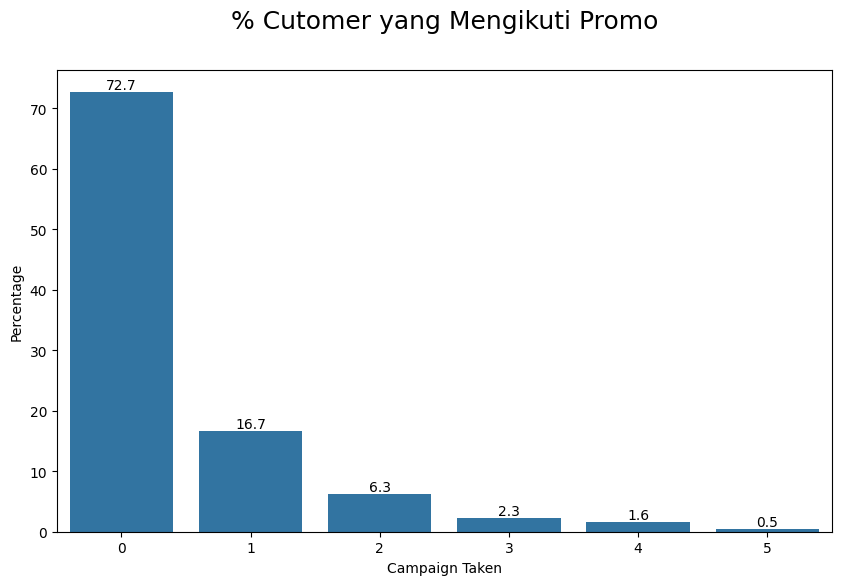

In [46]:
plt.figure(figsize=(10,6))
plot=sns.barplot(data=dfCampaignTaken,x='Campaign Taken',y='Percentage')
plt.title('% Cutomer yang Mengikuti Promo',size=18,pad=30)
plot.bar_label(plot.containers[0],label_type='edge')
plt.show()

**Analisis**

Dari sini dapat dilihat bahwa sebanyak 72.7% customer tidak pernah mengambil promo. Hal ini mengindikasikan bahwa promo yang ditawarkan selama ini kurang menarik dan perlu ditingkatkan dengan cukup signifikan, karena total orang yang mengikuti promo hanya sekitar 27.3% dari keseluruhan customer. Hal ini bisa saja disebabkan karena 2 hal :

1. Promo kurang terpublikasi sehingga banyak customer yang tidak ikut promo karena memang tidak tau.
2. Promo kurang menarik bagi customer.

## Analisis Berdasarkan Tipe Kampanye

In [47]:
Promo=df[['Campaign1','Campaign2','Campaign3','Campaign4','Campaign5','Response']].sum()
dfPromo=pd.DataFrame(Promo).reset_index().rename(columns={'index' : 'Promo', 0 : 'Jumlah_Promo_Diambil'})
dfPromo

,Promo,Jumlah_Promo_Diambil
0,Campaign1,142
1,Campaign2,30
2,Campaign3,163
3,Campaign4,164
4,Campaign5,162
5,Response,333


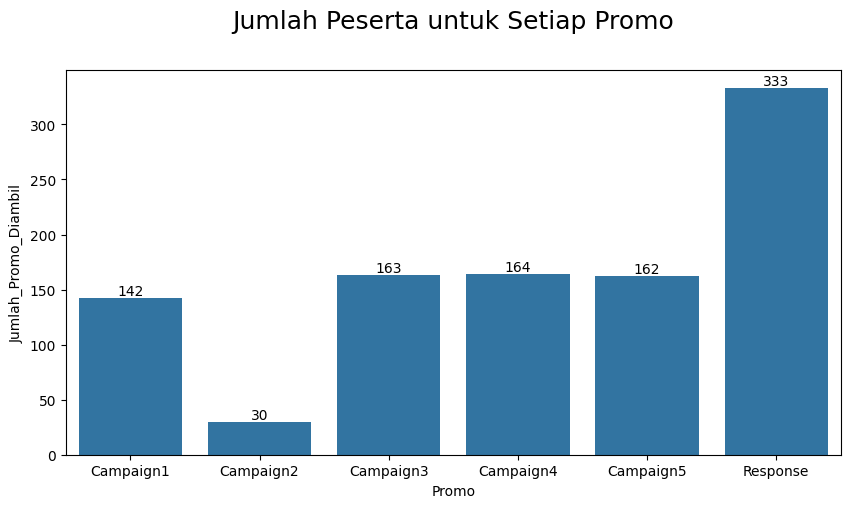

In [48]:
plt.figure(figsize=(10,5))
plot=sns.barplot(data = dfPromo, x='Promo', y='Jumlah_Promo_Diambil')
plt.title('Jumlah Peserta untuk Setiap Promo',size=18,pad=30)
plot.bar_label(plot.containers[0],label_type='edge')
plt.show()

**Analisis**

1. Kampanye terakhir dapat dikatakan jauh lebih sukses dari kampanye sebelumnya, bahkan mencapat 11 x lipat lebih banyak respon dari kampanye ke-2 dan 2 x lebih banyak respon dari kampanye 3, 4, dan 5. Oleh karena itu, sebaiknya untuk kampanye-kampanye selanjutnya, dianjurkan mengikuti strategi kampanye yang terakhir

**Analisis Ketertarikan Pelanggan Terhadap Promo Berdasarkan Beberapa Parameter**

## Analisis Promo Berdasarkan Age_Range

In [49]:
# Mencari total pelanggan berdasarkan umur
df['Age_Range'].value_counts()

Age_Range
36 - 45    749
46 - 55    482
56 - 65    433
26 - 35    411
> 66       79 
15 - 25    61 
Name: count, dtype: int64

In [50]:
dfbyAgeRange2=df.groupby('Age_Range')[['Campaign1','Campaign2','Campaign3','Campaign4','Campaign5','Response']].sum()
dfTotalSpentAge=df[['Total Spent','Age_Range']].groupby('Age_Range',as_index=False).sum()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '15 - 25'),
  Text(1, 0, '26 - 35'),
  Text(2, 0, '36 - 45'),
  Text(3, 0, '46 - 55'),
  Text(4, 0, '56 - 65'),
  Text(5, 0, '> 66')])

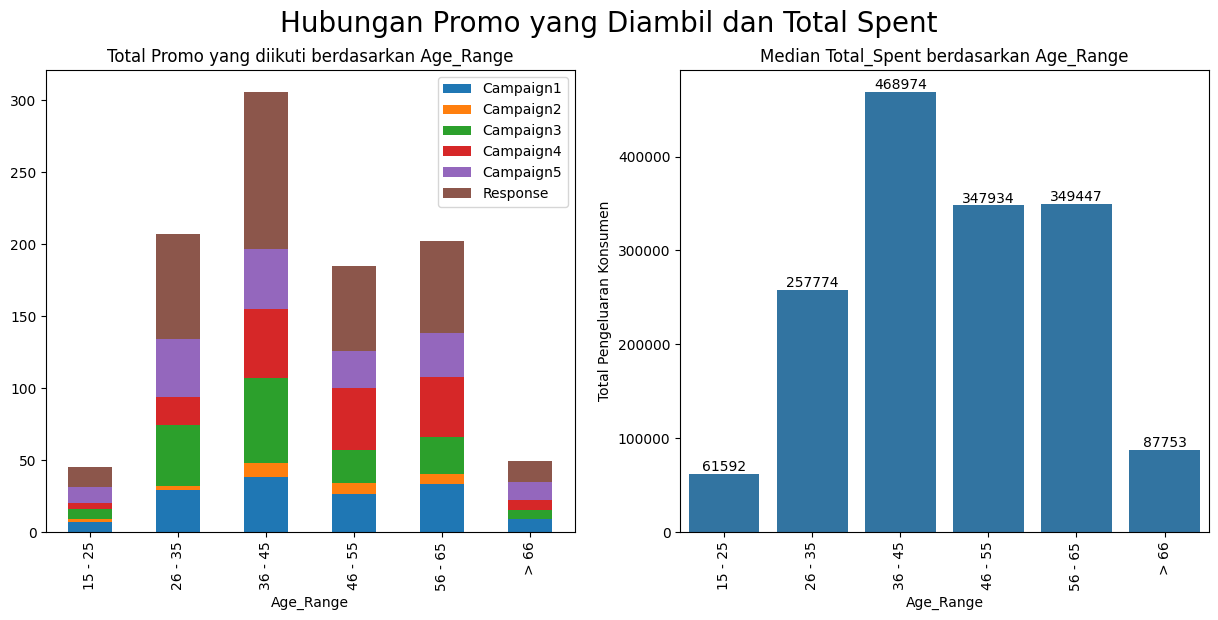

In [51]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(15,6))

plt.suptitle('Hubungan Promo yang Diambil dan Total Spent', size = 20)

dfbyAgeRange2.plot(kind='bar', stacked=True,ax=axes[0])
axes[0].set_title('Total Promo yang diikuti berdasarkan Age_Range')
plt.ylabel('Total Promo diikuti')
plot.bar_label(plot.containers[0],label_type='edge')
plt.xticks(rotation=90)


axes[1].set_title('Median Total_Spent berdasarkan Age_Range')
plot2=sns.barplot(data=dfTotalSpentAge,x='Age_Range',y='Total Spent',ax=axes[1])
plt.ylabel('Total Pengeluaran Konsumen')
plot2.bar_label(plot2.containers[0],label_type='edge')
plt.xticks(rotation=90)

**Analisis**

1. Berdasarkan umur, dapat dilihat bahwa semakin banyak orang yang mengambil promo, maka total_spentnya juga semakin tinggi. Hal ini menunjukkan keterkaitan antara jumlah promo yang diambil dan perilaku konsumtif seseorang.
2. Pada orang-orang berumur 26-35 Tahun, terlihat bahwa mereka sering mengambil promo tetapi jumlah uamg yang mereka habiskan sedikit. Kita menduga bahwa orang-orang di umur ini sedang struggling dengan keadaan finansial sehingga gencar mencari promo meskipun tidak dapat berbelanja terlalu banyak.

Sekarang, mari kita lihat apakah jenis promo sebenarnya mempengaruhi ketertarikan orang dari umur tertentu dengan menggunakan Chi-Square tes.

In [52]:
dfbyAgeRange2

,Campaign1,Campaign2,Campaign3,Campaign4,Campaign5,Response
Age_Range,,,,,,
15 - 25,7,2,7,4,11,14
26 - 35,29,3,42,20,40,73
36 - 45,38,10,59,48,42,109
46 - 55,26,8,23,43,26,59
56 - 65,33,7,26,42,30,64
> 66,9,0,6,7,13,14


In [53]:
stat, pvalue, dof, expected = chi2_contingency(dfbyAgeRange2)
# conclusion :
if pvalue > 0.05 :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
          Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara Rentang Umur dan Promo yang diambil ada keterkaitan (independent)'
          (proporsinya Tidak berbeda signifikan)
          ''')
else :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa antara Rentang Umur dan Promo yang diambil ada keterkaitan (dependent)
          (proporsinya berbeda signifikan)
          ''')


          pvalue = 0.03981. pvalue <= 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa antara Rentang Umur dan Promo yang diambil ada keterkaitan (dependent)
          (proporsinya berbeda signifikan)
          


Dari sini kita melihat bahwa ada keterkaitan antara jenis promo yang diikuti seseorang terhadap rentang umurnya. Sekarang, kita akan coba amati seberapa tertarik orang-orang pada kampanye yang sudah diadakan dengan melihat ratio total kampanye yang diikuti/pelanggan berdasarkan rentang umurnya :

In [54]:
dfbyAgeRange2['Total_Response'] = dfbyAgeRange2.sum(axis=1)
dfbyAgeRange2['n_customer'] = df['Age_Range'].value_counts()
dfbyAgeRange2['Ratio_Campaign_Taken'] = (dfbyAgeRange2['Total_Response']/dfbyAgeRange2['n_customer']).round(2)
dfbyAgeRange2=dfbyAgeRange2.reset_index()
dfbyAgeRange2

,Age_Range,Campaign1,Campaign2,Campaign3,Campaign4,Campaign5,Response,Total_Response,n_customer,Ratio_Campaign_Taken
0,15 - 25,7,2,7,4,11,14,45,61,0.74
1,26 - 35,29,3,42,20,40,73,207,411,0.50
2,36 - 45,38,10,59,48,42,109,306,749,0.41
3,46 - 55,26,8,23,43,26,59,185,482,0.38
4,56 - 65,33,7,26,42,30,64,202,433,0.47
5,> 66,9,0,6,7,13,14,49,79,0.62


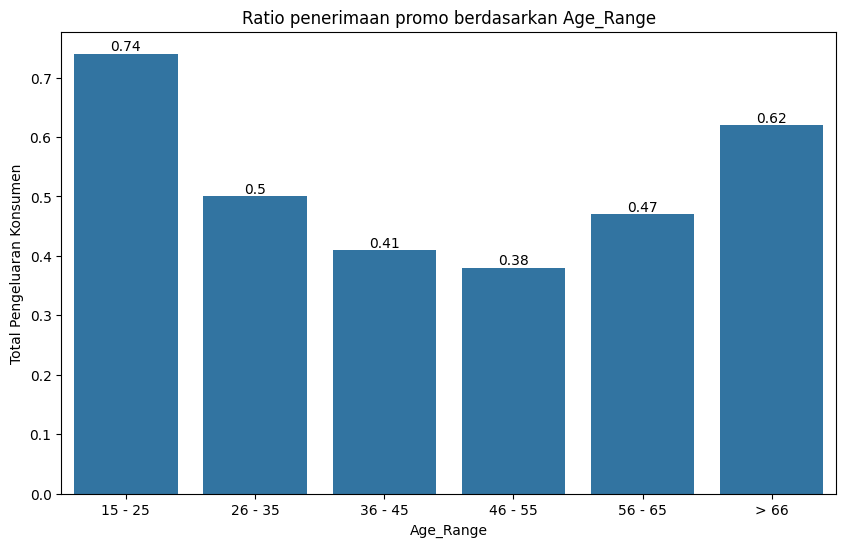

In [55]:
plt.figure(figsize=(10,6))
plot=sns.barplot(data=dfbyAgeRange2,x='Age_Range',y='Ratio_Campaign_Taken')
plt.title('Ratio penerimaan promo berdasarkan Age_Range')
plt.ylabel('Total Pengeluaran Konsumen')
plot.bar_label(plot.containers[0],label_type='edge')
plt.xticks(rotation=0)

plt.show()

**Analisis**

1. Customer yang paling banyak mengambil promo adalah customer dengan rentang umur 15-25 tahun. Hal ini diduga karena konten dari promo lebih bernuansa anak muda ataupun mereka punya lebih banyak waktu untuk mengecek promo yang sedang berlangsung
2. Dapat dilihat bahwa orang-orang di usia produktif mengambil promo lebih sedikit dibandingkan dengan orang-orang di usia tidak produktif. Oleh karena itu harusnya konten dari promo terseebut sebaiknya membawa hal-hal yang berhubungan dengan dunia kerja agar orang-orang di usia produktif tertarik untuk mengambil promonya

## Analisis Promo Berdasarkan Education

In [56]:
# Mencari total pelanggan berdasarkan jenjang pendidikan
df['Education'].value_counts()

Education
Undergraduate    1115
Master           565 
PhD              481 
Non-Graduate     54  
Name: count, dtype: int64

In [57]:
dfbyEducation2=df.groupby('Education')[['Campaign1','Campaign2','Campaign3','Campaign4','Campaign5','Response']].sum()
dfTotalSpentEducation=df[['Total Spent','Education']].groupby('Education',as_index=False).sum()

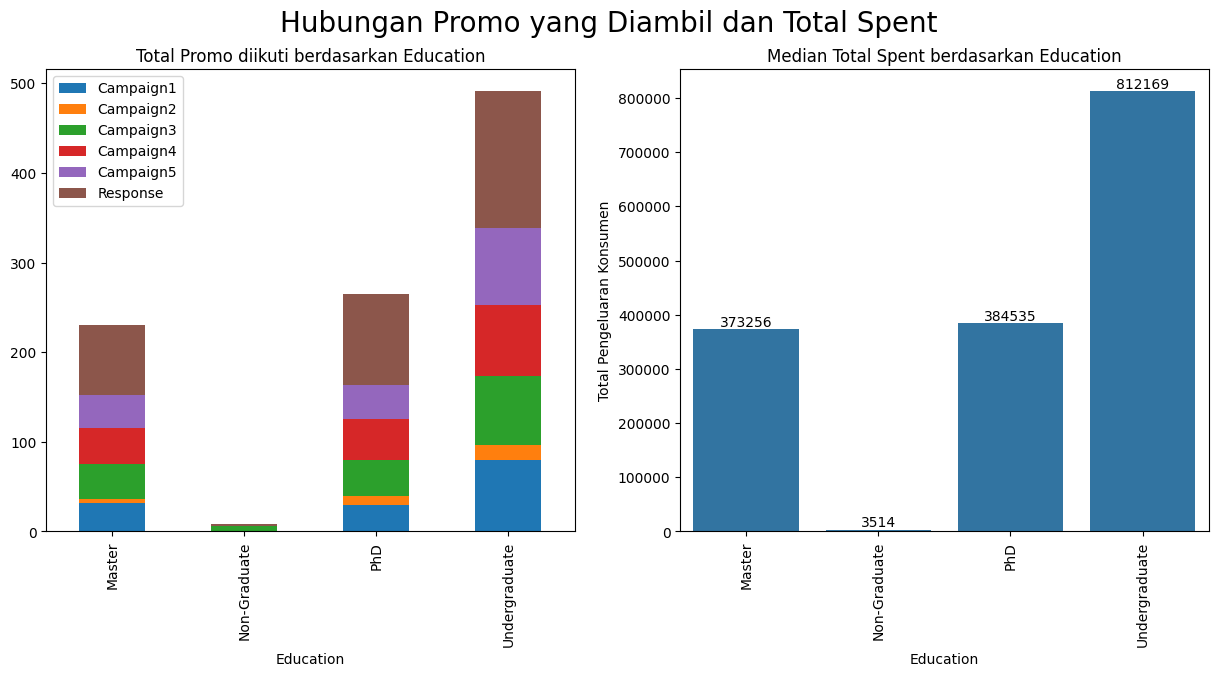

In [58]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(15,6))

plt.suptitle('Hubungan Promo yang Diambil dan Total Spent', size = 20)

dfbyEducation2.plot(kind='bar', stacked=True,ax=axes[0])
axes[0].set_title('Total Promo diikuti berdasarkan Education')
plt.ylabel('Total Promo diikuti')
plot.bar_label(plot.containers[0],label_type='edge')
plt.xticks(rotation=90)


axes[1].set_title('Median Total Spent berdasarkan Education')
plot2=sns.barplot(data=dfTotalSpentEducation,x='Education',y='Total Spent',ax=axes[1])
plt.ylabel('Total Pengeluaran Konsumen')
plot2.bar_label(plot2.containers[0],label_type='edge')
plt.xticks(rotation=90)

plt.show()

**Analisis**

1. Berdasarkan Education, dapat dilihat juga bahwa semakin banyak orang yang mengambil promo, maka total_spentnya juga semakin tinggi. Hal ini menunjukkan keterkaitan antara jumlah promo yang diambil dan perilaku konsumtif seseorang

Sekarang, mari kita lihat apakah jenis promo sebenarnya mempengaruhi ketertarikan orang dari jenjang pendidikan tertentu dengan menggunakan Chi-Square test

In [59]:
dfbyEducation2

,Campaign1,Campaign2,Campaign3,Campaign4,Campaign5,Response
Education,,,,,,
Master,32,4,39,40,37,78
Non-Graduate,0,0,6,0,0,2
PhD,30,10,40,45,39,101
Undergraduate,80,16,78,79,86,152


In [60]:
stat, pvalue, dof, expected = chi2_contingency(dfbyEducation2)
# conclusion :
if pvalue > 0.05 :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
          Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara Jenjang Pendidikan dan Promo yang diambil ada keterkaitan (independent)'
          (proporsinya Tidak berbeda signifikan)
          ''')
else :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa antara Jenjang Pendidikan dan Promo yang diambil ada keterkaitan (dependent)
          (proporsinya berbeda signifikan)
          ''')


          pvalue = 0.01224. pvalue <= 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa antara Jenjang Pendidikan dan Promo yang diambil ada keterkaitan (dependent)
          (proporsinya berbeda signifikan)
          


Dari sini kita melihat bahwa ada keterkaitan antara jenis promo yang diikuti seseorang terhadap jenjang pendidikannya. Sekarang, kita akan coba amati seberapa tertarik orang-orang pada kampanye yang sudah diadakan dengan melihat ratio total_kampanye_yang_diikuti/pelanggan berdasarkan jenjang pendidikannya :

In [61]:
dfbyEducation2['Total_Response'] = dfbyEducation2.sum(axis=1)
dfbyEducation2['n_customer'] = df['Education'].value_counts()
dfbyEducation2['Ratio_Campaign_Taken'] = (dfbyEducation2['Total_Response']/dfbyEducation2['n_customer']).round(2)
dfbyEducation2=dfbyEducation2.reset_index()
dfbyEducation2

,Education,Campaign1,Campaign2,Campaign3,Campaign4,Campaign5,Response,Total_Response,n_customer,Ratio_Campaign_Taken
0,Master,32,4,39,40,37,78,230,565,0.41
1,Non-Graduate,0,0,6,0,0,2,8,54,0.15
2,PhD,30,10,40,45,39,101,265,481,0.55
3,Undergraduate,80,16,78,79,86,152,491,1115,0.44


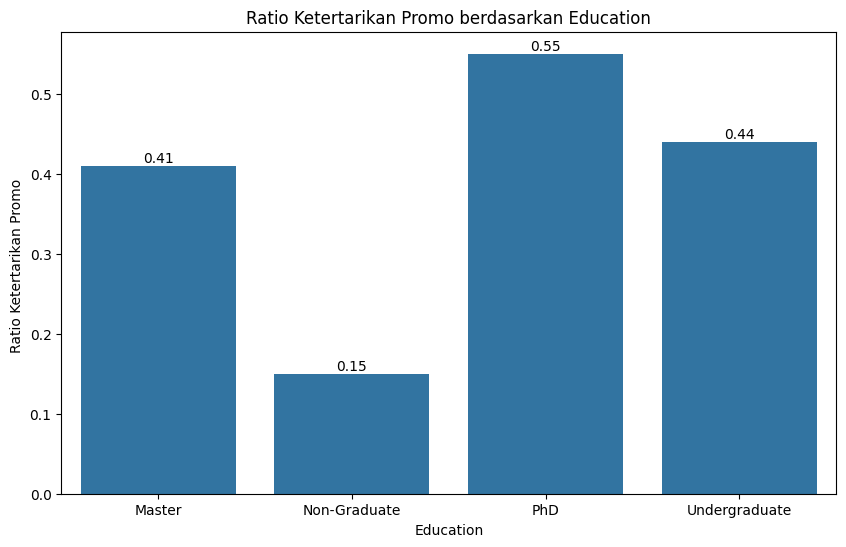

In [62]:
plt.figure(figsize=(10,6))
plot=sns.barplot(data=dfbyEducation2,x='Education',y='Ratio_Campaign_Taken')
plt.title('Ratio Ketertarikan Promo berdasarkan Education')
plt.ylabel('Ratio Ketertarikan Promo ')
plot.bar_label(plot.containers[0],label_type='edge')
plt.xticks(rotation=0)
plt.show()

**Analisis**

Customer yang paling banyak mengambil promo adalah customer dengan jenjang pendidikan PhD. Hal ini diduga karena orang dengan pendidikan PhD memiliki manajemen keuangan lebih baik sehingga mereka ingin memanfaatkan segala diskon yang bisa didapatkan

## Analisis Promo Berdasarkan Marital Status

In [63]:
# Mencari total pelanggan berdasarkan status pernikahan
df['Marital_Status'].value_counts()

Marital_Status
Married     1429
Single      478 
Divorced    308 
Name: count, dtype: int64

In [64]:
# Melihat pengeluaran orang-orang di supermarket berdasarkan status pernikahan
dfbyMaritalStatus2=df.groupby('Marital_Status')[['Campaign1','Campaign2','Campaign3','Campaign4','Campaign5','Response']].sum()
dfTotalSpentMarital=df[['Total Spent','Marital_Status']].groupby('Marital_Status',as_index=False).sum()

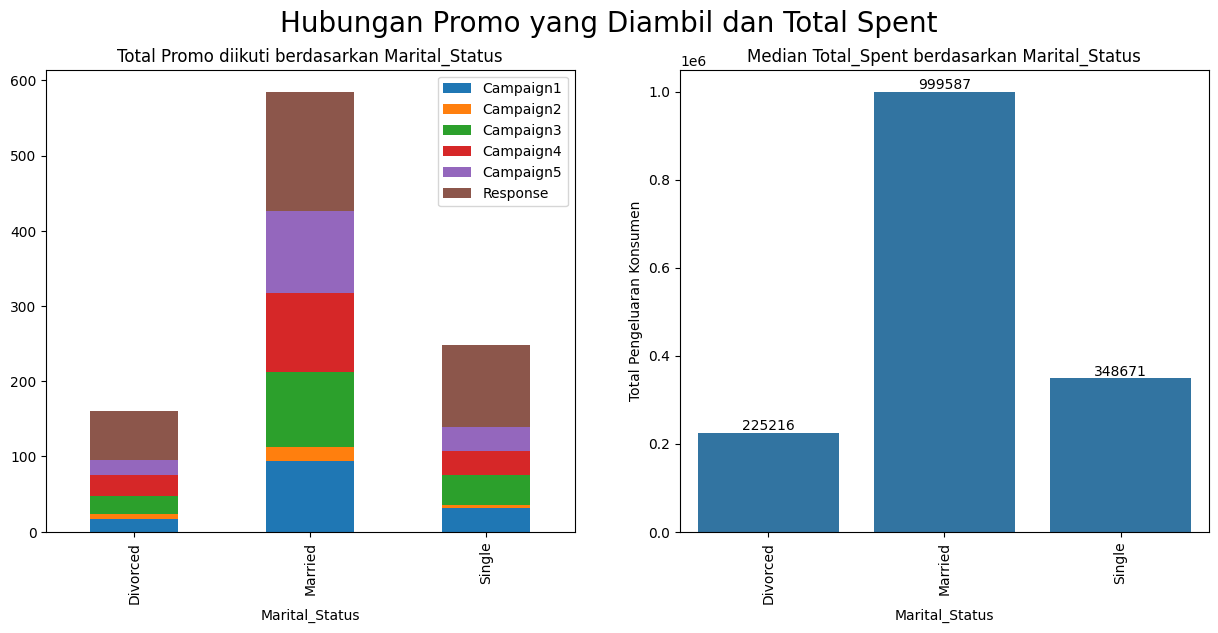

In [65]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(15,6))

plt.suptitle('Hubungan Promo yang Diambil dan Total Spent', size = 20)

dfbyMaritalStatus2.plot(kind='bar', stacked=True,ax=axes[0])
axes[0].set_title('Total Promo diikuti berdasarkan Marital_Status')
plt.ylabel('Total Promo diikuti')
plot.bar_label(plot.containers[0],label_type='edge')
plt.xticks(rotation=90)


axes[1].set_title('Median Total_Spent berdasarkan Marital_Status')
plot2=sns.barplot(data=dfTotalSpentMarital,x='Marital_Status',y='Total Spent',ax=axes[1])
plt.ylabel('Total Pengeluaran Konsumen')
plot2.bar_label(plot2.containers[0],label_type='edge')
plt.xticks(rotation=90)

plt.show()

**Analisis**

1. Berdasarkan Marital Status, dapat dilihat juga bahwa semakin banyak orang yang mengambil promo, maka total_spentnya juga semakin tinggi. Hal ini menunjukkan keterkaitan antara jumlah promo yang diambil dan perilaku konsumtif seseorang

Sekarang, mari kita lihat apakah jenis promo sebenarnya mempengaruhi ketertarikan orang menurut status pernikahannya dengan menggunakan Chi-Square test

In [66]:
dfbyMaritalStatus2

,Campaign1,Campaign2,Campaign3,Campaign4,Campaign5,Response
Marital_Status,,,,,,
Divorced,17,6,24,28,20,66
Married,94,19,100,104,110,158
Single,31,5,39,32,32,109


In [67]:
stat, pvalue, dof, expected = chi2_contingency(dfbyMaritalStatus2)
# conclusion :
if pvalue > 0.05 :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
          Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara Staths Pernikahan dan Promo yang diambil ada keterkaitan (independent)'
          (proporsinya Tidak berbeda signifikan)
          ''')
else :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa antara Staths Pernikahan dan Promo yang diambil ada keterkaitan (dependent)
          (proporsinya berbeda signifikan)
          ''')


          pvalue = 0.00052. pvalue <= 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa antara Staths Pernikahan dan Promo yang diambil ada keterkaitan (dependent)
          (proporsinya berbeda signifikan)
          


Dari sini kita melihat bahwa ada keterkaitan antara jenis promo yang diikuti oleh seseorang terhadap status pernikahannya. Sekarang, kita akan coba amati seberapa tertarik orang-orang pada kampanye yang sudah diadakan dengan melihat ratio total_kampanye_yang_diikuti/pelanggan berdasarkan status pernikahannya 

In [68]:
dfbyMaritalStatus2['Total_Response'] = dfbyMaritalStatus2.sum(axis=1)
dfbyMaritalStatus2['n_customer'] = df['Marital_Status'].value_counts()
dfbyMaritalStatus2['Ratio_Campaign_Taken'] = (dfbyMaritalStatus2['Total_Response']/dfbyMaritalStatus2['n_customer']).round(2)
dfbyMaritalStatus2=dfbyMaritalStatus2.reset_index()
dfbyMaritalStatus2

,Marital_Status,Campaign1,Campaign2,Campaign3,Campaign4,Campaign5,Response,Total_Response,n_customer,Ratio_Campaign_Taken
0,Divorced,17,6,24,28,20,66,161,308,0.52
1,Married,94,19,100,104,110,158,585,1429,0.41
2,Single,31,5,39,32,32,109,248,478,0.52


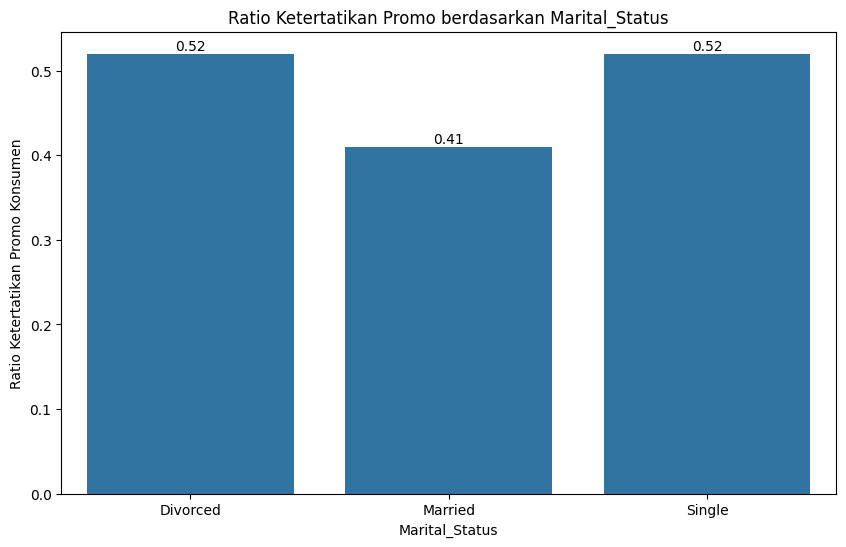

In [69]:
plt.figure(figsize=(10,6))
plot=sns.barplot(data=dfbyMaritalStatus2,x='Marital_Status',y='Ratio_Campaign_Taken')
plt.title('Ratio Ketertatikan Promo berdasarkan Marital_Status')
plt.ylabel('Ratio Ketertatikan Promo Konsumen')
plot.bar_label(plot.containers[0],label_type='edge')
plt.xticks(rotation=0)
plt.show()

**Analisis**

1. Customer yang paling banyak mengambil promo adalah customer dengan status bercerai dan single. Hal ini diduga karena orang yang sudah bercerai dan single memiliki kondisi ekonomi yang cukup sulit sehingga mereka ingin memanfaatkan segala diskon yang bisa didapatkan.

## Analisis Promo Berdasarkan Total_People

In [70]:
# Mencari total pelanggan berdasarkan Jumlah orang dirumah
df['Total_People'].value_counts()

Total_People
3    879
2    757
4    296
1    252
5    31 
Name: count, dtype: int64

In [71]:
# Melihat pengeluaran orang-orang di supermarket berdasarkan Jumlah orang dirumah
dfbyTotalPeople=df.groupby('Total_People')[['Campaign1','Campaign2','Campaign3','Campaign4','Campaign5','Response']].sum()
dfTotalSpentPeople=df[['Total Spent','Total_People']].groupby('Total_People',as_index=False).sum()

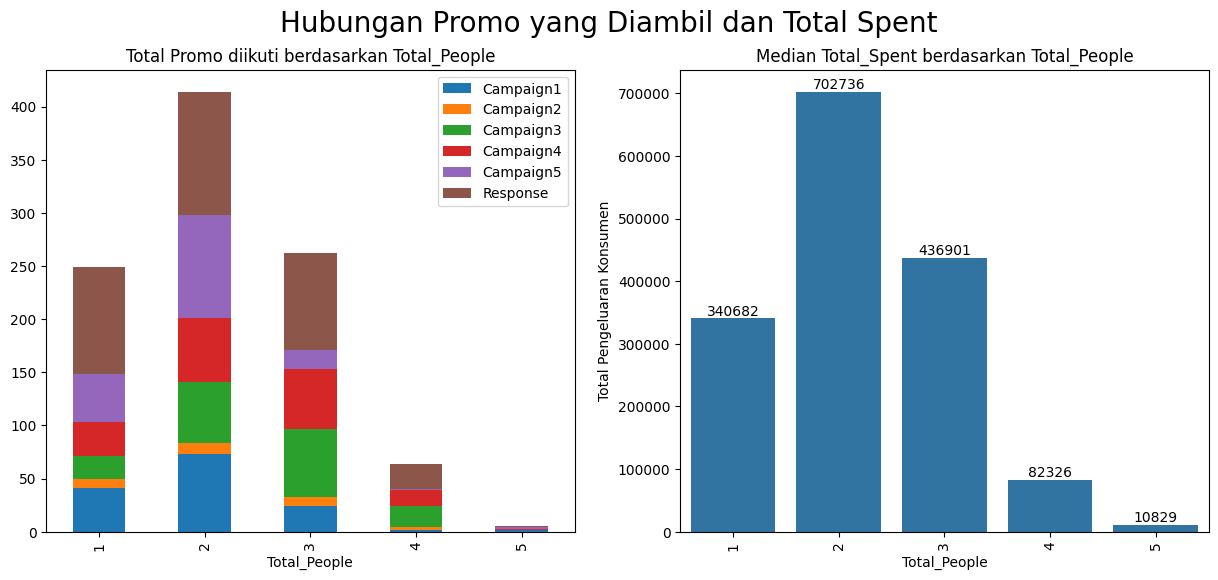

In [72]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(15,6))

plt.suptitle('Hubungan Promo yang Diambil dan Total Spent', size = 20)

dfbyTotalPeople.plot(kind='bar', stacked=True,ax=axes[0])
axes[0].set_title('Total Promo diikuti berdasarkan Total_People')
plt.ylabel('Total Promo diikuti')
plot.bar_label(plot.containers[0],label_type='edge')
plt.xticks(rotation=90)


axes[1].set_title('Median Total_Spent berdasarkan Total_People')
plot2=sns.barplot(data=dfTotalSpentPeople,x='Total_People',y='Total Spent',ax=axes[1])
plt.ylabel('Total Pengeluaran Konsumen')
plot2.bar_label(plot2.containers[0],label_type='edge')
plt.xticks(rotation=90)

plt.show()

**Analisis**

1. Berdasarkan Total_People, dapat dilihat juga bahwa semakin banyak orang yang mengambil promo, maka total_spentnya juga semakin tinggi. Hal ini menunjukkan keterkaitan antara jumlah promo yang diambil dan perilaku konsumtif seseorang

Sekarang, mari kita lihat apakah jenis promo sebenarnya mempengaruhi ketertarikan orang berdasarkan jumlah orang dirumahnya dengan menggunakan Chi-Square test

In [73]:
dfbyTotalPeople

,Campaign1,Campaign2,Campaign3,Campaign4,Campaign5,Response
Total_People,,,,,,
1,41,9,21,32,45,101
2,73,10,58,60,97,116
3,24,9,64,56,18,91
4,2,2,20,15,1,24
5,2,0,0,1,1,1


In [74]:
stat, pvalue, dof, expected = chi2_contingency(dfbyTotalPeople)
# conclusion :
if pvalue > 0.05 :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
          Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara Jumlah Orang Dirumah dan Promo yang diambil ada keterkaitan (independent)'
          (proporsinya Tidak berbeda signifikan)
          ''')
else :
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa antara Jumlah Orang Dirumah dan Promo yang diambil ada keterkaitan (dependent)
          (proporsinya berbeda signifikan)
          ''')


          pvalue = 0.00000. pvalue <= 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa antara Jumlah Orang Dirumah dan Promo yang diambil ada keterkaitan (dependent)
          (proporsinya berbeda signifikan)
          


Dari sini kita melihat bahwa ada keterkaitan antara jenis promo yang diikuti oleh seseorang terhadap jumlah orang dirumahnya. Sekarang, kita akan coba amati seberapa tertarik orang-orang pada kampanye yang sudah diadakan dengan melihat ratio total kampanye yang diikuti/pelanggan berdasarkan jumlah orang dirumahnya :

In [75]:
dfbyTotalPeople['Total_Response'] = dfbyTotalPeople.sum(axis=1)
dfbyTotalPeople['n_customer'] = df['Total_People'].value_counts()
dfbyTotalPeople['Ratio_Campaign_Taken'] = (dfbyTotalPeople['Total_Response']/dfbyTotalPeople['n_customer']).round(2)
dfbyTotalPeople=dfbyTotalPeople.reset_index()
dfbyTotalPeople

,Total_People,Campaign1,Campaign2,Campaign3,Campaign4,Campaign5,Response,Total_Response,n_customer,Ratio_Campaign_Taken
0,1,41,9,21,32,45,101,249,252,0.99
1,2,73,10,58,60,97,116,414,757,0.55
2,3,24,9,64,56,18,91,262,879,0.30
3,4,2,2,20,15,1,24,64,296,0.22
4,5,2,0,0,1,1,1,5,31,0.16


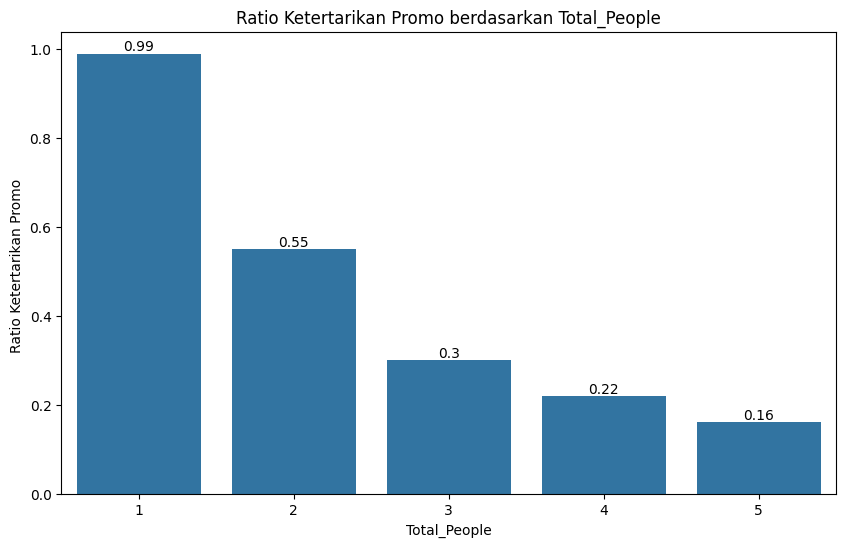

In [76]:
plt.figure(figsize=(10,6))
plot=sns.barplot(data=dfbyTotalPeople,x='Total_People',y='Ratio_Campaign_Taken')
plt.title('Ratio Ketertarikan Promo berdasarkan Total_People')
plt.ylabel('Ratio Ketertarikan Promo ')
plot.bar_label(plot.containers[0],label_type='edge')
plt.xticks(rotation=0)
plt.show()

**Analisis**

Customer yang paling banyak mengambil promo adalah customer yang hanya memiliki 1 orang dirumahnya. Nilai 0.99 menunjukkan semua pelanggan paling tidak mengambil 1 promo selama 2 tahun terakhir. Padahal seharusnya, orang-orang yang lebih membutuhkan promo adalah orang-orang yang memiliki banyak anggota dirumahnya. Sebaiknya kedepannya menggunakan promo bundling agar orang-orang yang memiliki banyak anggota dirumahnya menjadi lebih tertarik

## Kesimpulan

Dari analisis diatas dapat kita simpulkan sebagai berikut :

Bagaimana karakteristik pelanggan dan apakah ada kategori produk yang lebih disukai oleh pelanggan dibandingkan dengan yang lain ?
1. Secara umum, setiap umur memiliki trend pengeluaran yang sama, yaitu wine, kemudian diikuti dengan produk daging, kemudian diikuti dengan produk emas. Hal ini berarti prioritas orang-orang baik yang sudah menikah, sudah bercerai, maupun yang masih single, adalah hiburan (wine), kemudian kebutuhan pangan (daging), dan kemudian investasi (emas).
2. Kesimpulan secara umumnya adalah semakin tua seseorang, maka penghasilan mereka cendrung naik dan perilaku mereka juga menjadi semakin konsumtif.
3. Pada kelompok customer yang tidak menempuh pendidikan sarjana (non-graduate), justru terlihat bahwa prioritas mereka adalah produk investasi (emas), kemudian kebutuhan pangan (produk daging dan produk ikan).
4. Secara general, 3 kategori produk favorit dari setiap jenis status pernikahan adalah sama, yaitu wine, produk daging, dan emas. Hal ini berarti prioritas orang-orang baik yang sudah menikah, sudah bercerai, maupun yang masih single, adalah hiburan (wine), kemudian kebutuhan pangan (daging), dan kemudian investasi (emas)
5. Dapat dilihat bahwa terdapat sesuatu yang unik dimana semakin banyak jumlah orang dirumah, justru pengeluarannya semakin mengecil. Pengeluaran paling besar dihabiskan oleh orang yang sendiri (single)
6. penghasilan terbesar supermarket (sekitar 85% dari pendapatan perusahaan) berasal dari wine, kemudian diikuti oleh produk daging, dan kemudian emas. Jika kita generalisir, orang-orang lebih banyak mengeluarkan uangnya untuk hiburan (wine), kemudian kebutuhan pangan (daging), dan kemudian investasi (emas).
7. Dari data juga terlihat bahwa pembelian buah-buahan sangat sedikit (4.3% dari revenue supermarket). Padahal buah termasuk produk yang beresiko dan membutuhkan pengamanan tinggi (harus memakai freezer). Oleh karena itu bisa dipertimbangkan untuk menghilangkan buah dari daftar produk supermarket.

Strategi seperti apa yang dapat diterapkan untuk menarik pelanggan baru dan meningkatkan retensi pelanggan ?
1. Dari data diatas dapat dilihat bahwa sebanyak 72.7% customer tidak pernah mengambil promo. Hal ini mengindikasikan bahwa promo yang ditawarkan selama ini kurang menarik dan perlu ditingkatkan dengan cukup signifikan, karena total orang yang mengikuti promo hanya sekitar 27.3% dari keseluruhan customer.
2. Kampanye terakhir dapat dikatakan jauh lebih sukses dari kampanye sebelumnya, bahkan mencapat 11 x lipat lebih banyak respon dari kampanye ke-2 dan 2 x lebih banyak respon dari kampanye 3, 4, dan 5. Oleh karena itu, sebaiknya untuk kampanye-kampanye selanjutnya, dianjurkan mengikuti strategi kampanye yang terakhir.

## Rekomendasi

Berdasarkan kesimpulan diatas, diberikan rekomendasi sebagai berikut :

1. Sebaiknya, supermarket memperluas stok produk dalam kategori wine, daging, dan emas guna meningkatkan kontribusi pendapatan perusahaan yang mencapai 85%. 
2. Bersamaan dengan itu, perlu evaluasi terhadap produk buah agar dihilangkan, mengingat kontribusinya yang rendah (4.3%), sementara memiliki masa kadaluarsa yang cepat dan membutuhkan fasilitas pendingin yang mahal. 
3. Fokus penjualan sebaiknya disesuaikan dengan kebutuhan orang di usia produktif, sambil meningkatkan frekuensi penawaran produk wine untuk pelanggan dengan status pernikahan bercerai. 
4. Demikian pula, peningkatan frekuensi penawaran produk ikan dapat ditargetkan untuk orang-orang yang single atau lanjut usia. 
5. Adapun penawaran produk investasi dan pangan sebaiknya ditingkatkan untuk pelanggan yang tidak memiliki gelar sarjana. 
6. Untuk mempertahankan dan meningkatkan kepuasan pelanggan, perlu dipertahankan standar kualitas produk dan layanan pelanggan yang tinggi. 
7. Evaluasi rutin terhadap kepuasan pelanggan dan analisis kinerja perusahaan akan menjadi dasar untuk perbaikan dan penyesuaian strategi pemasaran di tahun-tahun berikutnya.
8. Sebaiknya kampanye dilakukan dengan lebih baik lagi mengingat pelanggan yang tertarik dengan promo masing terbilang kecil yaitu 27.3%.
9. Dalam strategi kampanye berikutnya, usahakan untuk menerapkan strategi kampanye yang telah digunakan dalam kampanye terakhir.
10. Hindari menggunakan strategi kampanye yang digunakan dalam kampanye ke dua.
11. Sertakan promosi yang secara khusus ditargetkan untuk individu di usia produktif. 
12. Buatlah promosi yang ditujukan khusus bagi mereka yang memiliki pasangan atau berstatus menikah.